<center><p float="center">
  <img src="https://upload.wikimedia.org/wikipedia/commons/e/e9/4_RGB_McCombs_School_Brand_Branded.png" width="300" height="100"/>
  <img src="https://mma.prnewswire.com/media/1458111/Great_Learning_Logo.jpg?p=facebook" width="200" height="100"/>
</p></center>

<center><font size=10>Artificial Intelligence and Machine Learning</center></font>
<center><font size =6>Supervised Learning - Week 4</font></center>


<center><img src="https://images.unsplash.com/photo-1604594849809-dfedbc827105?crop=entropy&cs=tinysrgb&fm=jpg&ixlib=rb-1.2.1&q=80&raw_url=true&ixid=MnwxMjA3fDB8MHxwaG90by1wYWdlfHx8fGVufDB8fHx8&auto=format&fit=crop&w=870" width="800" height="500"></center>

<center><font size=6>Income Group Classification</font></center>

## Problem Statement


### Context

DeltaSquare is an NGO that works with the government on matters of social policy to bring about a change in the lives of underprivileged sections of society. They are given a task of coming up with a policy framework using a dataset that the government received from WHO.

### Objective

You, as a Data Scientist at DeltaSquare, are tasked with analyzing the data provided to identify the different factors that influence the income of an individual, build a prediction model that can help the government formulate policies for the right pockets of the society, and share a proposal for the government.

### Dataset

The data contains characteristics of the people

* age: continuous - age of a Person
* workclass: Where does a person works - categorical - (Private, Self-emp-not-inc, Self-emp-inc, Federal-gov, Local-gov, State-gov, Without-pay, Never-worked, Unknown)
* fnlwgt: continuous - Weight assigned by Current Population Survey (CPS) - People with similar demographic characteristics should have similar weights since it is a feature aimed to allocate similar weights to people with similar demographic characteristics.
* education: Degree the person has - categorical - (Bachelors, Some-college, 11th, HS-grad, Prof-school, Assoc-acdm, Assoc-voc, 9th, 7th-8th, 12th, Masters, 1st-4th, 10th, Doctorate, 5th-6th, Preschool)
* education-num: no. of years a person studied - continuous.
* marital-status: categorical - (Married, Never-married, Not-married)
* occupation: categorical - (Tech-support, Craft-repair, Other-service, Sales, Exec-managerial, Prof-specialty, Handlers-cleaners, Machine-op-inspct, Adm-clerical, Farming-fishing, Transport-moving, Priv-house-serv, Protective-serv, Armed-Forces, Unknown)
* race: categorical - (White, Asian-Pac-Islander, Amer-Indian-Eskimo, Other, Black)
* sex: categorical - (Female, Male)
* capital-gain: Investment gain of the person other than salary - continuous
* capital-loss: Loss from investments - continuous
* hours-per-week: No. of hours a person works - continuous.
* native-contienent: categorical - (North America, Asia, Other, Europe, South America)
* salary: >50K, <=50K (dependent variable, the salary is in Dollars per year)

## Installing and Loading Libraries

In [6]:
!pip install pandas==2.0.3 numpy==1.25.2 matplotlib==3.7.1 seaborn==0.13.1 scikit-learn==1.2.2 -q --user

Note: After running the above cell, kindly restart the Runtime by clicking Runtime->Restart session. Then, execute the cells from below. When using a jupyter notebook, the kernel can be restarted.

In [7]:
# Libraries to help with reading and manipulating data

import pandas as pd
import numpy as np

# Library to split data
from sklearn.model_selection import train_test_split

# libaries to help with data visualization
import matplotlib.pyplot as plt
import seaborn as sns

# Removes the limit for the number of displayed columns
pd.set_option("display.max_columns", None)
# Sets the limit for the number of displayed rows
pd.set_option("display.max_rows", 200)



# To build model for prediction
from sklearn.svm import SVC

#Preprocessing
from sklearn.preprocessing import MinMaxScaler

# To get diferent metric scores
from sklearn.metrics import (
    f1_score,
    accuracy_score,
    recall_score,
    precision_score,
    confusion_matrix,
  )

# Suppressing the warnings.
import warnings
warnings.filterwarnings("ignore")

## Loading data

In [8]:
who = pd.read_csv("who_data.csv")

In [9]:
# copying data to another variable to avoid any changes to original data
data = who.copy()

## Overview of the data

### View the first and last 5 rows of the dataset.

In [10]:
data.head()

,age,workclass,fnlwgt,education,education_no_of_years,marital_status,occupation,race,sex,capital_gain,capital_loss,working_hours_per_week,native_contienent,salary
0,39,State-gov,77516,Bachelors,13,Never-married,Adm-clerical,White,Male,2174,0,40,north_america,<=50K
1,50,Self-emp-not-inc,83311,Bachelors,13,married,Exec-managerial,White,Male,0,0,13,north_america,<=50K
2,38,Private,215646,HS-grad,9,not_married,Handlers-cleaners,White,Male,0,0,40,north_america,<=50K
3,53,Private,234721,11th,7,married,Handlers-cleaners,Black,Male,0,0,40,north_america,<=50K
4,28,Private,338409,Bachelors,13,married,Prof-specialty,Black,Female,0,0,40,north_america,<=50K


In [11]:
data.tail()

,age,workclass,fnlwgt,education,education_no_of_years,marital_status,occupation,race,sex,capital_gain,capital_loss,working_hours_per_week,native_contienent,salary
32526,27,Private,257302,Assoc-acdm,12,married,Tech-support,White,Female,0,0,38,north_america,<=50K
32527,40,Private,154374,HS-grad,9,married,Machine-op-inspct,White,Male,0,0,40,north_america,>50K
32528,58,Private,151910,HS-grad,9,not_married,Adm-clerical,White,Female,0,0,40,north_america,<=50K
32529,22,Private,201490,HS-grad,9,Never-married,Adm-clerical,White,Male,0,0,20,north_america,<=50K
32530,52,Self-emp-inc,287927,HS-grad,9,married,Exec-managerial,White,Female,15024,0,40,north_america,>50K


-  The dataset contains information about different types of people.

### Understand the shape of the dataset.

In [12]:
data.shape

(32531, 14)

* The dataset has 32531 rows and 14 columns

### Check the data types of the columns for the dataset.

In [13]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32531 entries, 0 to 32530
Data columns (total 14 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   age                     32531 non-null  int64 
 1   workclass               32531 non-null  object
 2   fnlwgt                  32531 non-null  int64 
 3   education               32531 non-null  object
 4   education_no_of_years   32531 non-null  int64 
 5   marital_status          32531 non-null  object
 6   occupation              32531 non-null  object
 7   race                    32531 non-null  object
 8   sex                     32531 non-null  object
 9   capital_gain            32531 non-null  int64 
 10  capital_loss            32531 non-null  int64 
 11  working_hours_per_week  32531 non-null  int64 
 12  native_contienent       32531 non-null  object
 13  salary                  32531 non-null  object
dtypes: int64(6), object(8)
memory usage: 3.5+ MB


* Dependent variable is the salary which is of categorical type.
* age, fnlwgt, education_no_of_years, capital gain, capital loss and working_hours_per_week are of integer type while other variables are of categorical type.
* There are no missing values in the dataset.

### Checking for duplicate values

In [14]:
data.duplicated().sum()

0

- There are no duplicate values in the dataset.

### Checking for missing values

In [15]:
data.isnull().sum()

age                       0
workclass                 0
fnlwgt                    0
education                 0
education_no_of_years     0
marital_status            0
occupation                0
race                      0
sex                       0
capital_gain              0
capital_loss              0
working_hours_per_week    0
native_contienent         0
salary                    0
dtype: int64

- There are no missing values in the dataset

### Statistical summary

In [16]:
data.describe().T

,count,mean,std,min,25%,50%,75%,max
age,32531.0,38.588362,13.637644,17.0,28.0,37.0,48.0,90.0
fnlwgt,32531.0,189788.230826,105564.168325,12285.0,117815.0,178370.0,237019.0,1484705.0
education_no_of_years,32531.0,10.081953,2.571842,1.0,9.0,10.0,12.0,16.0
capital_gain,32531.0,1078.642649,7388.624210,0.0,0.0,0.0,0.0,99999.0
capital_loss,32531.0,87.384341,403.137260,0.0,0.0,0.0,0.0,4356.0
working_hours_per_week,32531.0,40.441025,12.347506,1.0,40.0,40.0,45.0,99.0


* `age`: Average age of people in the dataset is around 38 years, age has a wide range from 17 to 90 years.
* `education_no_of_years`: The average number of years spent in education is ~10 years. There's a large difference between the minimum value and 25th percentile which indicates that there might be outliers present in this variable.
* `capital_gain`: There's a huge difference in the 75th percentile and maximum value of capital_gain indicating the presence of outliers. Also, 75% of the observations are 0.
* `capital_loss`: Same as capital gain there's a huge difference in the 75th percentile and maximum value indicating the presence of outliers. Also, 75% of the observations are 0.
* `working_hours_per_week`: On average people work for 40 hours a week. A vast difference in minimum value and 25th percentile, as well as 75th percentile and the maximum value, indicates that there might be outliers present in the variable.

## <a name='link2'>Exploratory Data Analysis (EDA) Summary</a>

### **Note**: The EDA section has been covered multiple times in the previous case studies. In this case study, we will mainly focus on the model building aspects. We will only be looking at the key observations from EDA. The detailed EDA can be found in the <a href = #link1>appendix section</a>.

**The below functions need to be defined to carry out the EDA.**

In [17]:
def histogram_boxplot(data, feature, figsize=(15, 10), kde=False, bins=None):
    """
    Boxplot and histogram combined

    data: dataframe
    feature: dataframe column
    figsize: size of figure (default (15,10))
    kde: whether to show the density curve (default False)
    bins: number of bins for histogram (default None)
    """
    f2, (ax_box2, ax_hist2) = plt.subplots(
        nrows=2,  # Number of rows of the subplot grid= 2
        sharex=True,  # x-axis will be shared among all subplots
        gridspec_kw={"height_ratios": (0.25, 0.75)},
        figsize=figsize,
    )  # creating the 2 subplots
    sns.boxplot(
        data=data, x=feature, ax=ax_box2, showmeans=True, color="violet"
    )  # boxplot will be created and a triangle will indicate the mean value of the column
    sns.histplot(
        data=data, x=feature, kde=kde, ax=ax_hist2, bins=bins
    ) if bins else sns.histplot(
        data=data, x=feature, kde=kde, ax=ax_hist2
    )  # For histogram
    ax_hist2.axvline(
        data[feature].mean(), color="green", linestyle="--"
    )  # Add mean to the histogram
    ax_hist2.axvline(
        data[feature].median(), color="black", linestyle="-"
    )  # Add median to the histogram

In [18]:
# function to create labeled barplots


def labeled_barplot(data, feature, perc=False, n=None):
    """
    Barplot with percentage at the top

    data: dataframe
    feature: dataframe column
    perc: whether to display percentages instead of count (default is False)
    n: displays the top n category levels (default is None, i.e., display all levels)
    """

    total = len(data[feature])  # length of the column
    count = data[feature].nunique()
    if n is None:
        plt.figure(figsize=(count + 2, 6))
    else:
        plt.figure(figsize=(n + 2, 6))

    plt.xticks(rotation=90, fontsize=15)
    ax = sns.countplot(
        data=data,
        x=feature,
        palette="Paired",
        order=data[feature].value_counts().index[:n],
    )

    for p in ax.patches:
        if perc == True:
            label = "{:.1f}%".format(
                100 * p.get_height() / total
            )  # percentage of each class of the category
        else:
            label = p.get_height()  # count of each level of the category

        x = p.get_x() + p.get_width() / 2  # width of the plot
        y = p.get_height()  # height of the plot

        ax.annotate(
            label,
            (x, y),
            ha="center",
            va="center",
            size=12,
            xytext=(0, 5),
            textcoords="offset points",
        )  # annotate the percentage

    plt.show()  # show the plot

In [19]:
def stacked_barplot(data, predictor, target):
    """
    Print the category counts and plot a stacked bar chart

    data: dataframe
    predictor: independent variable
    target: target variable
    """
    count = data[predictor].nunique()
    sorter = data[target].value_counts().index[-1]
    tab1 = pd.crosstab(data[predictor], data[target], margins=True).sort_values(
        by=sorter, ascending=False
    )
    print(tab1)
    print("-" * 120)
    tab = pd.crosstab(data[predictor], data[target], normalize="index").sort_values(
        by=sorter, ascending=False
    )
    tab.plot(kind="bar", stacked=True, figsize=(count + 5, 5))
    plt.legend(
        loc="lower left", frameon=False,
    )
    plt.legend(loc="upper left", bbox_to_anchor=(1, 1))
    plt.show()

In [20]:
### function to plot distributions wrt target


def distribution_plot_wrt_target(data, predictor, target):

    fig, axs = plt.subplots(2, 2, figsize=(12, 10))

    target_uniq = data[target].unique()

    axs[0, 0].set_title("Distribution of target for target=" + str(target_uniq[0]))
    sns.histplot(
        data=data[data[target] == target_uniq[0]],
        x=predictor,
        kde=True,
        ax=axs[0, 0],
        color="teal",
        stat="density",
    )

    axs[0, 1].set_title("Distribution of target for target=" + str(target_uniq[1]))
    sns.histplot(
        data=data[data[target] == target_uniq[1]],
        x=predictor,
        kde=True,
        ax=axs[0, 1],
        color="orange",
        stat="density",
    )

    axs[1, 0].set_title("Boxplot w.r.t target")
    sns.boxplot(data=data, x=target, y=predictor, ax=axs[1, 0], palette="gist_rainbow")

    axs[1, 1].set_title("Boxplot (without outliers) w.r.t target")
    sns.boxplot(
        data=data,
        x=target,
        y=predictor,
        ax=axs[1, 1],
        showfliers=False,
        palette="gist_rainbow",
    )

    plt.tight_layout()
    plt.show()

In [21]:
df = data.copy()

### Univariate Analysis

#### Observations on hours_per_week

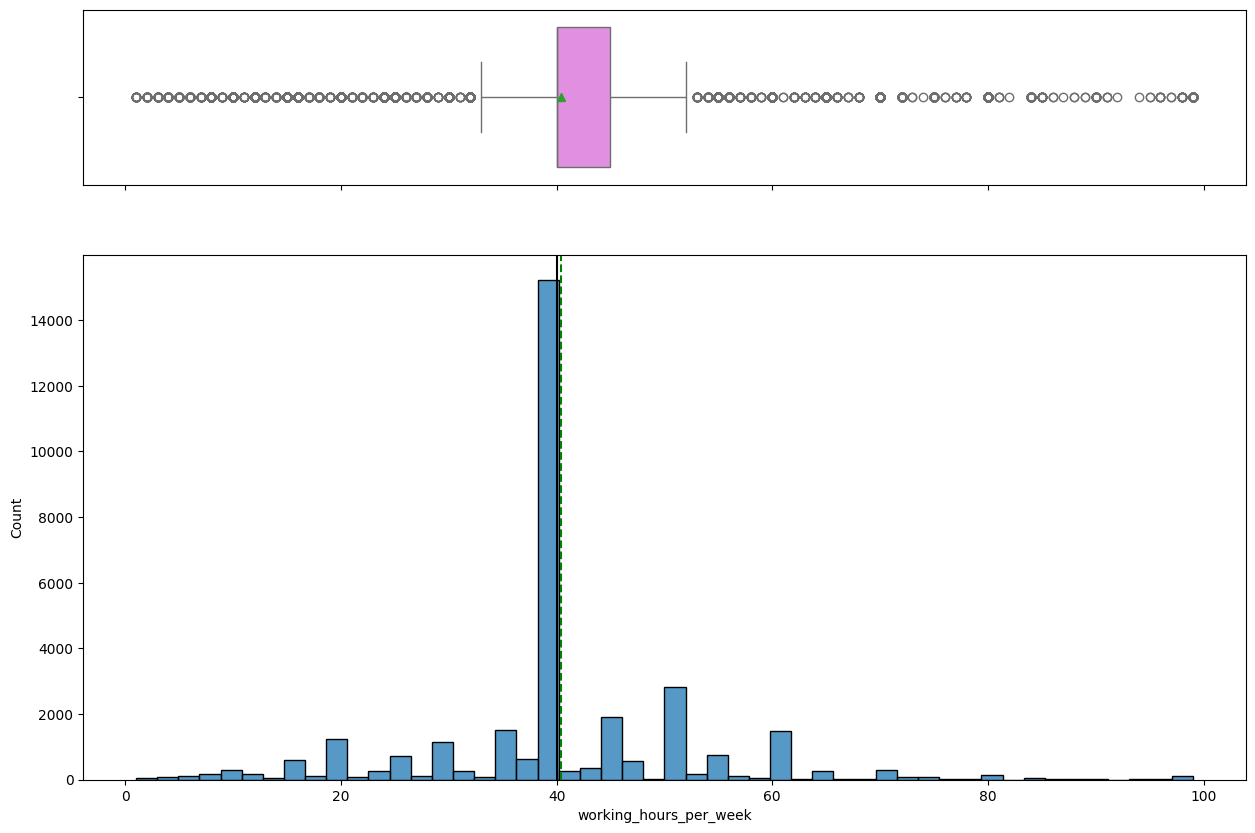

In [22]:
histogram_boxplot(df, "working_hours_per_week", bins=50)

* Most of the data is concentrated around 40 working hours this gives a sense that most of the observations in data might be salaried employees working 8hrs 5 days a week.
* Some of the observations are clear outliers which needs to be treated.

#### Observations on workclass

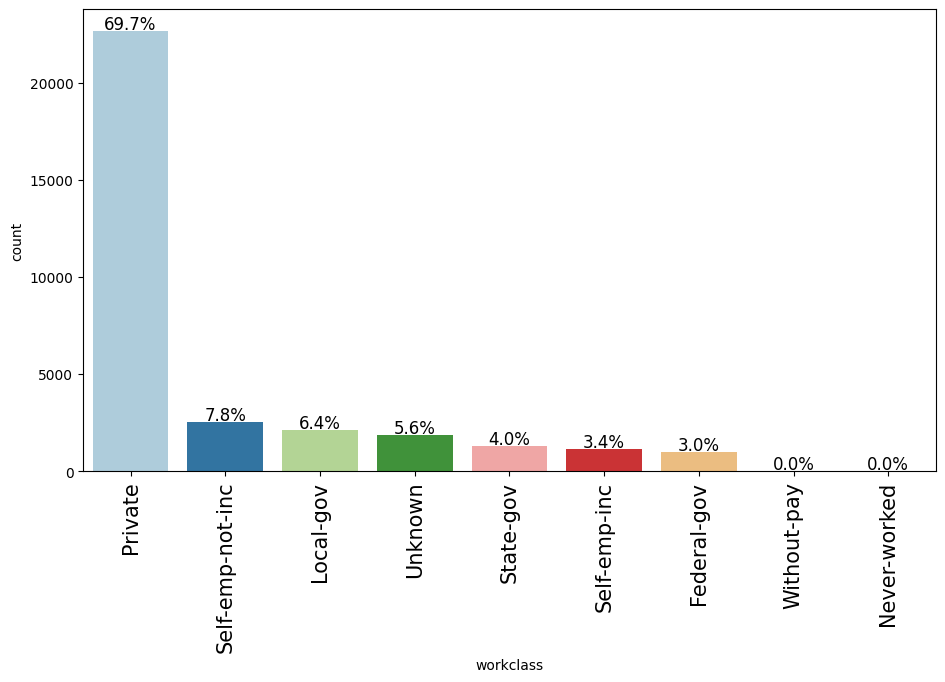

In [23]:
labeled_barplot(df, "workclass", perc=True)

* ~70% of the observations are from the Private sector working class.
* As expected from the number of hours per week.

#### Observations on native_country

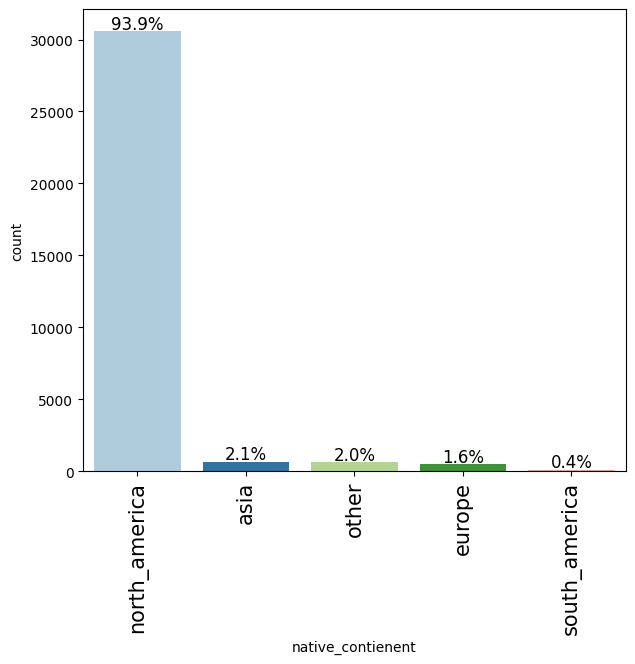

In [24]:
labeled_barplot(df, "native_contienent", perc=True)

* ~94% of the people are native to north_america followed by 2.1% Asians.

#### Observations on salary

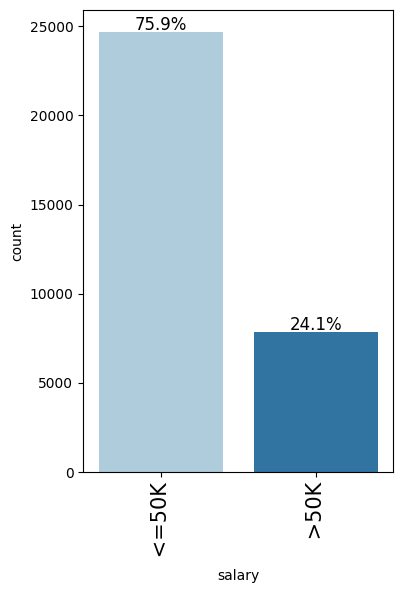

In [25]:
labeled_barplot(df, "salary", perc=True)

* ~24% of the observations have a salary above 50K and while ~76% have a salary below 50K

### Bivariate analysis

#### Correlation check

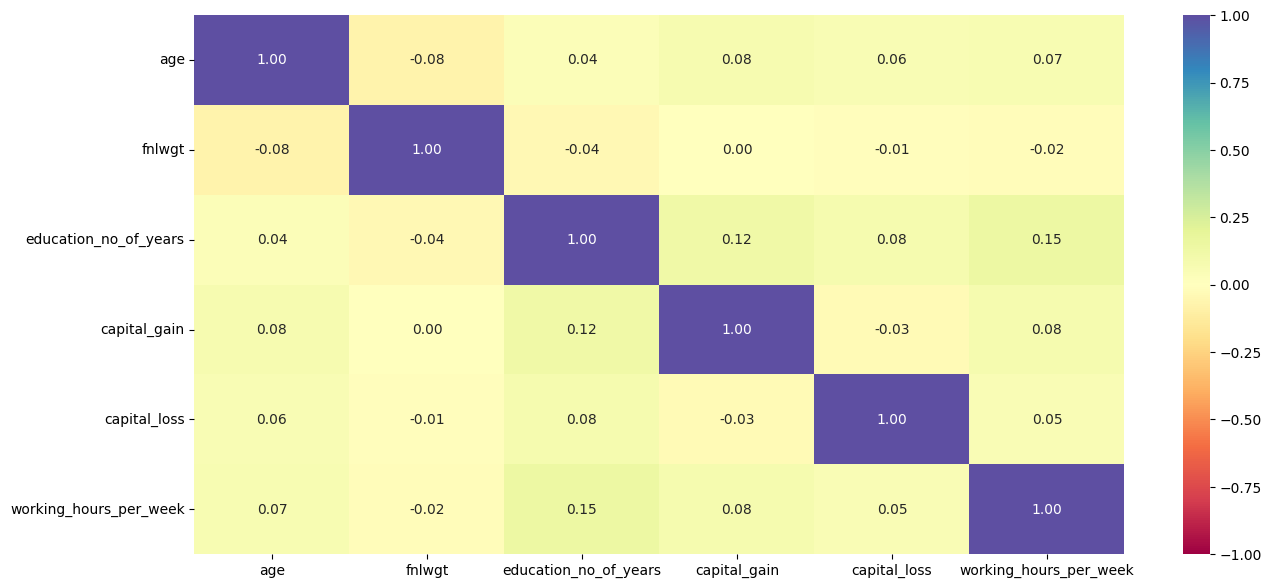

In [26]:
plt.figure(figsize=(15, 7))
sns.heatmap(df.corr(numeric_only=True), annot=True, vmin=-1, vmax=1, fmt=".2f", cmap="Spectral")
plt.show()

* There is no significant correlation between the columns.

#### salary vs sex

salary   <=50K   >50K    All
sex                         
All      24692   7839  32531
Male     15113   6660  21773
Female    9579   1179  10758
------------------------------------------------------------------------------------------------------------------------


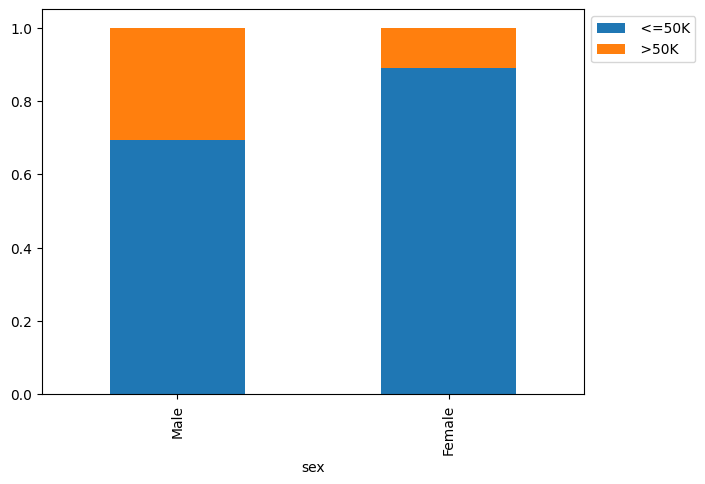

In [27]:
stacked_barplot(df, "sex", "salary")

* ~30% of the males have salary >50K whereas only ~10% of the females have salary >50K.
* This shows the pay gap that exists in society and the government should investigate further on it to formulate policy to ensure equal pay.

#### salary vs education

salary         <=50K   >50K    All
education                         
All            24692   7839  32531
Bachelors       3132   2221   5353
HS-grad         8816   1674  10490
Some-college    5894   1386   7280
Masters          763    959   1722
Prof-school      153    423    576
Assoc-voc       1021    361   1382
Doctorate        107    306    413
Assoc-acdm       802    265   1067
10th             871     62    933
11th            1115     60   1175
7th-8th          605     40    645
12th             400     33    433
9th              487     27    514
5th-6th          316     16    332
1st-4th          160      6    166
Preschool         50      0     50
------------------------------------------------------------------------------------------------------------------------


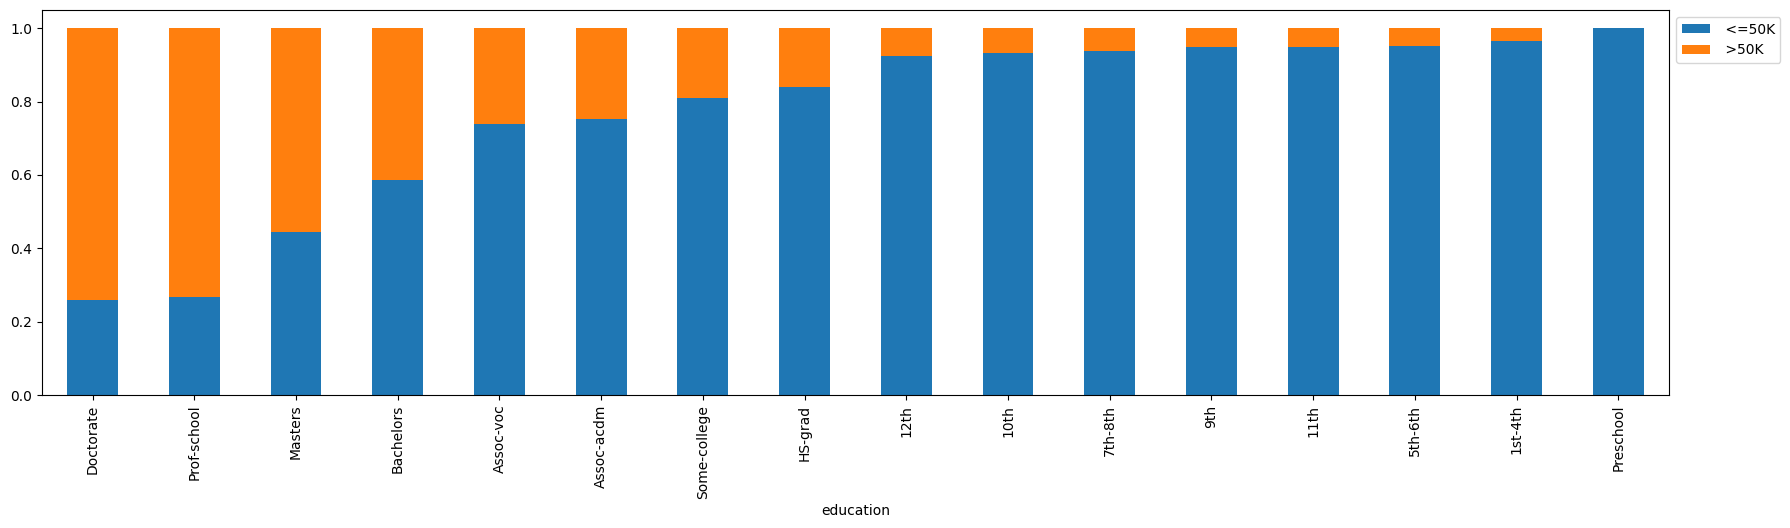

In [28]:
stacked_barplot(df, "education", "salary")

* ~70% of the people of are Doctorate, graduate from Professional school program (Prof-school) have a salary above $50K.
* This clearly shows a positive relationship between education and salary, the higher the education higher is the salary.

#### salary vs occupation

salary              <=50K   >50K    All
occupation                             
All                 24692   7839  32531
Exec-managerial      2097   1968   4065
Prof-specialty       2278   1858   4136
Sales                2666    983   3649
Craft-repair         3164    929   4093
Adm-clerical         3259    507   3766
Transport-moving     1277    320   1597
Tech-support          644    283    927
Machine-op-inspct    1750    249   1999
Protective-serv       438    211    649
Unknown              1652    191   1843
Other-service        3153    137   3290
Farming-fishing       877    115    992
Handlers-cleaners    1283     86   1369
Armed-Forces            8      1      9
Priv-house-serv       146      1    147
------------------------------------------------------------------------------------------------------------------------


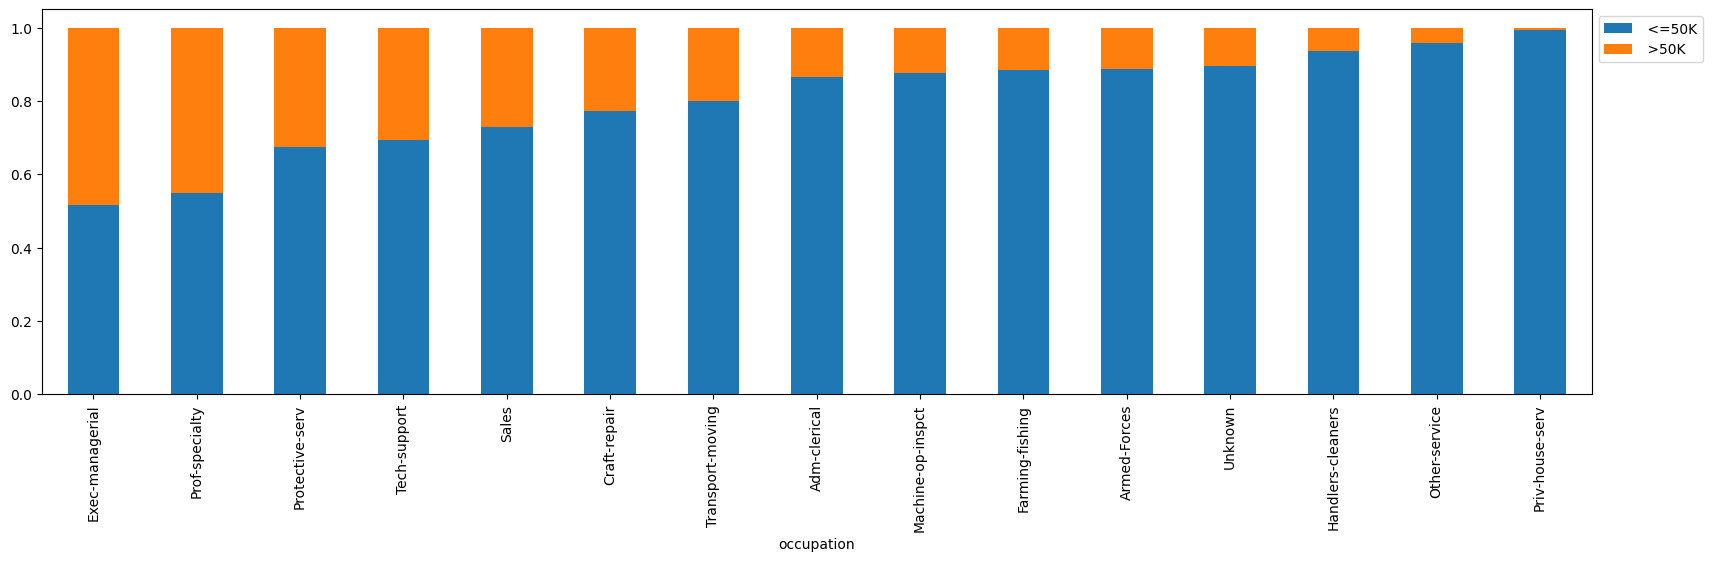

In [29]:
stacked_barplot(df, "occupation", "salary")

- ~50% of the people whose occupation is of Executive Manager, Professor-speciality have a salary above $50,000
- People with occupations like Private house service,handlers-cleaners, farming-fishing have a higher likelihood of having below 50K salary.

#### salary vs workclass

salary             <=50K   >50K    All
workclass                             
All                24692   7839  32531
Private            17706   4961  22667
Self-emp-not-inc    1816    724   2540
Self-emp-inc         494    622   1116
Local-gov           1476    617   2093
Federal-gov          589    371    960
State-gov            945    353   1298
Unknown             1645    191   1836
Never-worked           7      0      7
Without-pay           14      0     14
------------------------------------------------------------------------------------------------------------------------


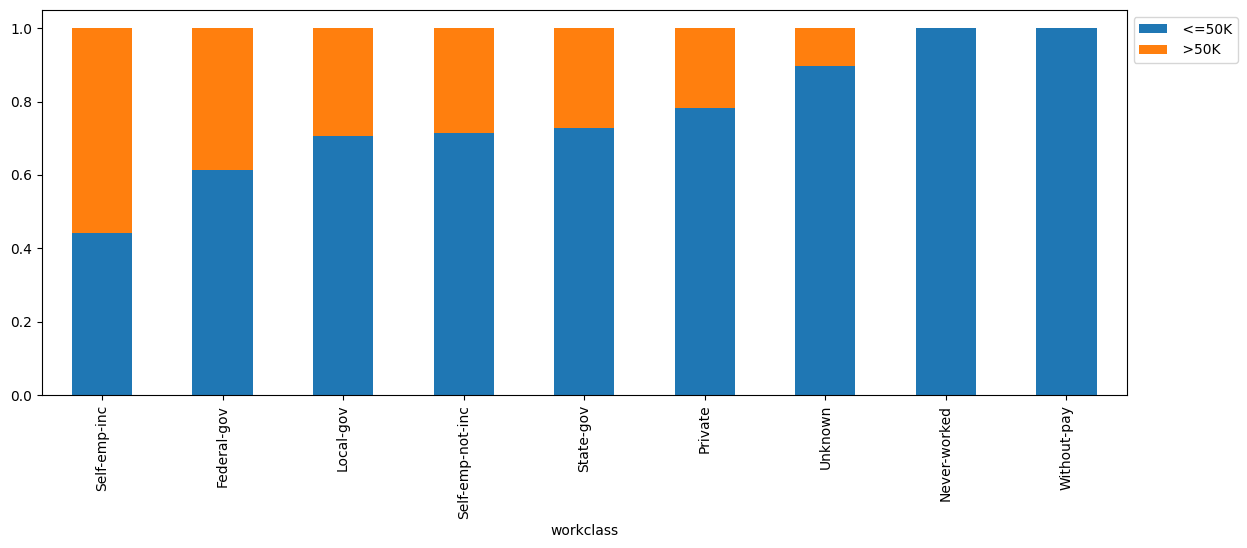

In [30]:
stacked_barplot(df, "workclass", "salary")

* ~50% of the self-employed people have a salary above 50K followed by ~40% of the federal govt employee who has salary more than 50K.
* ~20% of the people working in the private sector earn more than 50K.

#### salary vs age

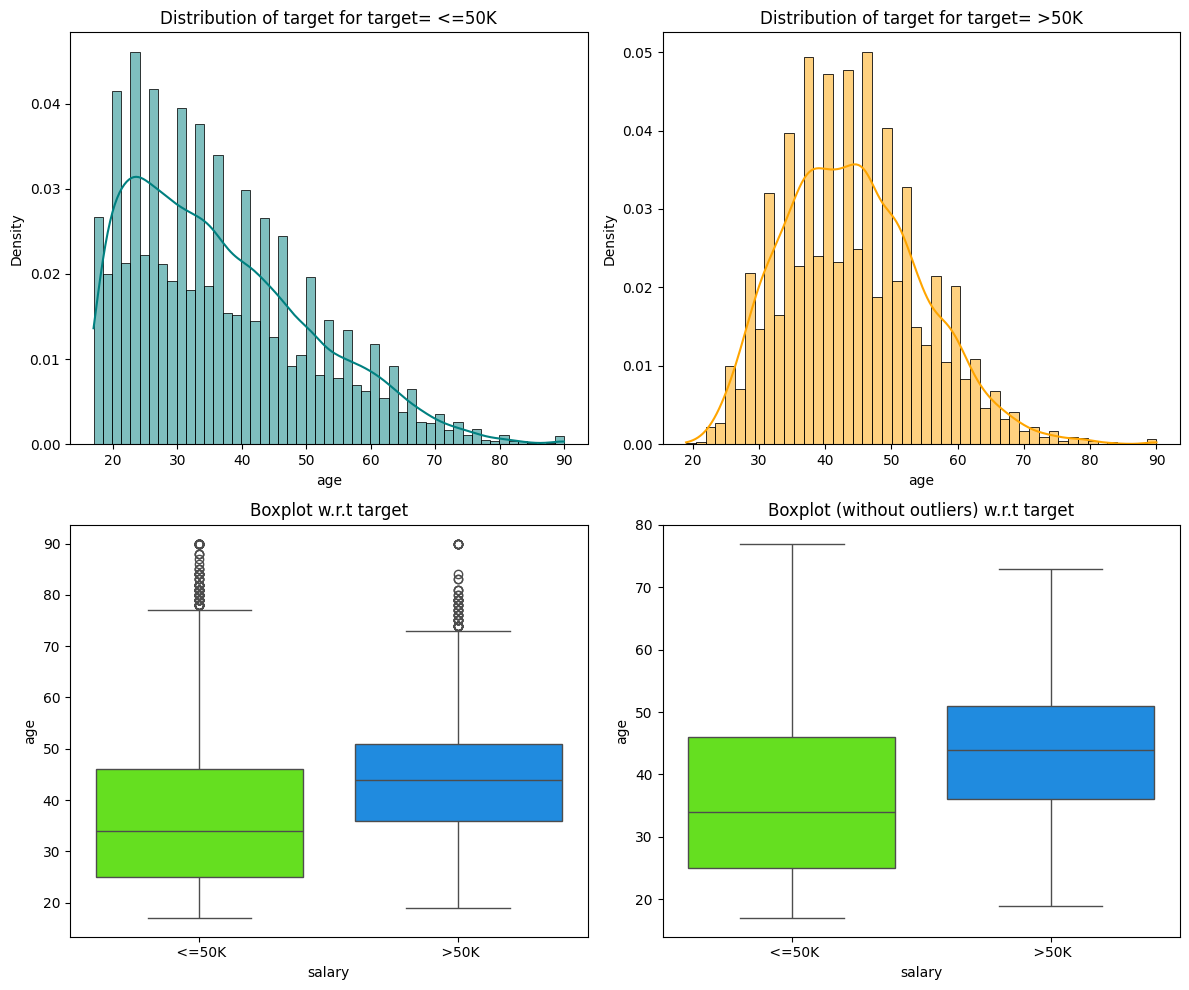

In [31]:
distribution_plot_wrt_target(df, "age", "salary")

* People who more than 50K salary are generally older having an average age of around 48 years.
* People who have less than 50K salary have an average age of around 36.

#### salary vs working_hours_per_week

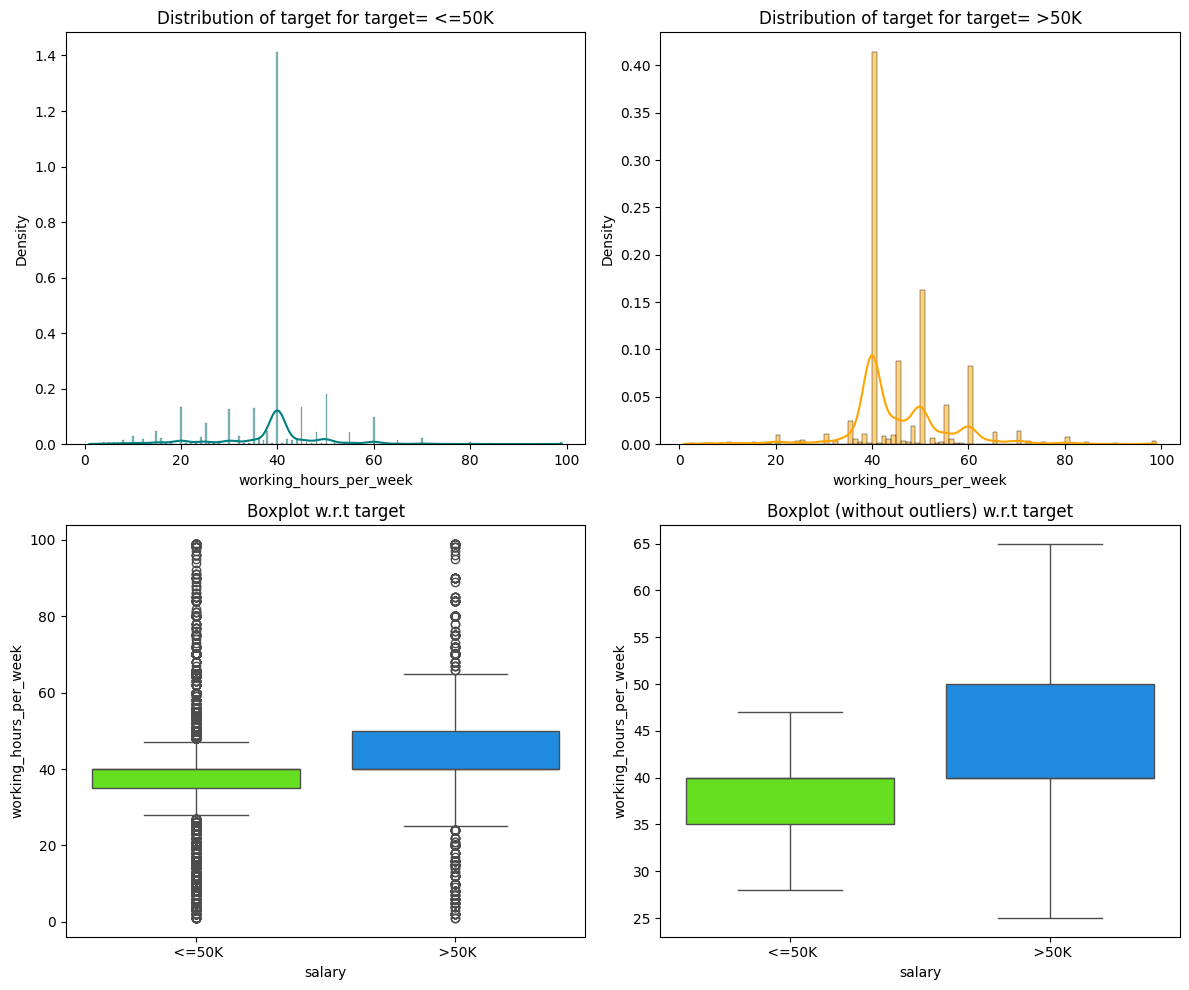

In [32]:
distribution_plot_wrt_target(df, "working_hours_per_week", "salary")

* Majority of people having above 50K salary work around 40 hours per week.
* Those having >50K salary have a higher range of working hours as compared to the ones with <=50K, but there are outliers present.

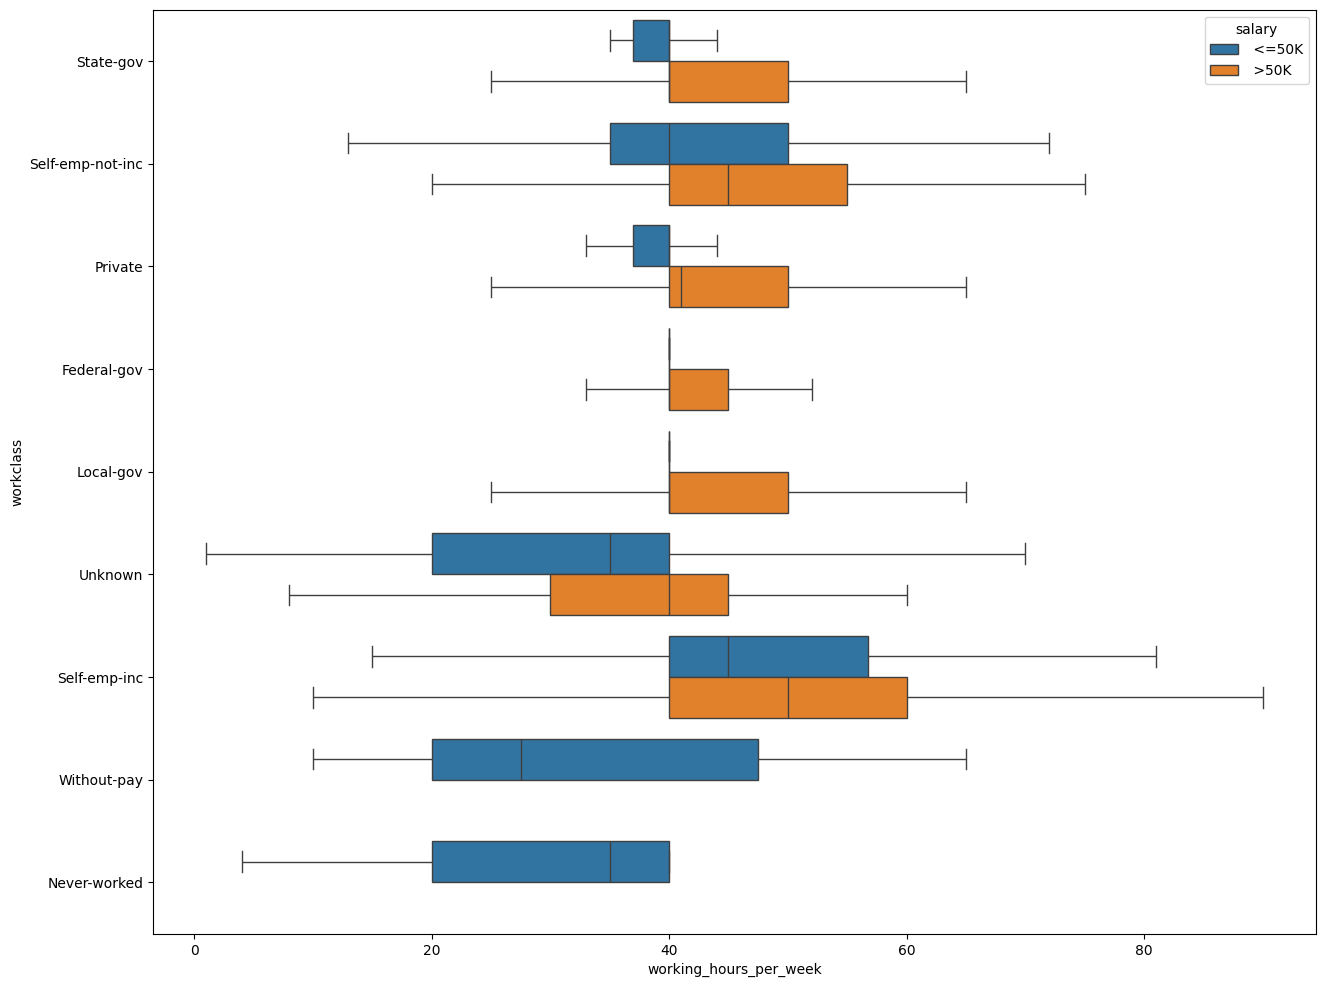

In [33]:
# lets see how working hours per week vary across different occupation
plt.figure(figsize=(15, 12))
sns.boxplot(
    y="workclass", x="working_hours_per_week", data=df, hue="salary", showfliers=False
)
plt.show()

* Private sector employees work for more hours to get a salary above 50K.
* There's large variability in the working hours of self-employed people which makes sense as they might be working at their ease.
* Without pay and never worked will have no income or less than 50K income.
* The number of working hours for many government employees is concentrated at 40 hrs a week, which makes sense as government employees generally have fixed working hours.

**Actions for data pre-processing**:

* Many variables have outliers that need to be treated.
* We can drop capital_gain and capital_loss as most of the observations are 0 in these variables, and if the government already knows a person's capital gain or loss it will be easier for them to classify a person into a salary group.

## Data Preprocessing

* We can drop capital_gain and capital_loss as most of the observations are 0 in these variables, and if the government already knows a person's capital gain or loss it will be easier for them to classify a person into a salary group
* There are many outliers in the data which we will treat (perform capping of outliers)
  * All the values smaller than the lower whisker will be assigned the value of the lower whisker, and all the values above the upper whisker will be assigned the value of the upper whisker.

**Dropping capital_gain and capital_loss**

In [34]:
data.drop(["capital_gain", "capital_loss"], axis=1, inplace=True)

### Outlier Detection

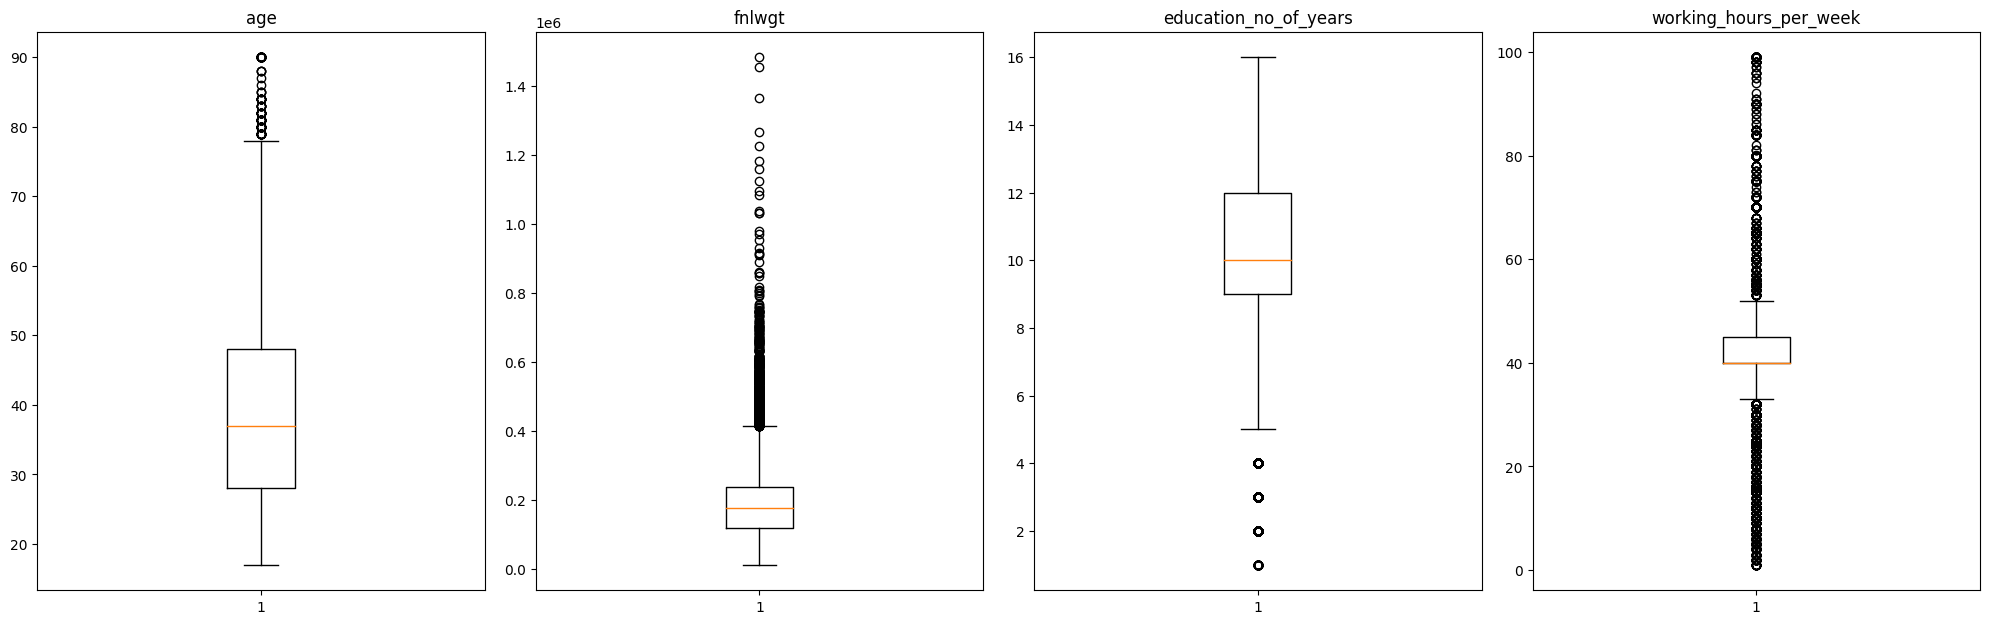

In [35]:
numerical_col = data.select_dtypes(include=np.number).columns.tolist()
plt.figure(figsize=(20, 30))

for i, variable in enumerate(numerical_col):
    plt.subplot(5, 4, i + 1)
    plt.boxplot(data[variable], whis=1.5)
    plt.tight_layout()
    plt.title(variable)

plt.show()

* Age and fnlwgt have upper outliers.
* education_no_years has lower outliers.
* working_hours_per_week has both upper and lower outliers.

### Outlier Treatment

In [36]:
# functions to treat outliers by flooring and capping


def treat_outliers(df, col):
    """
    Treats outliers in a variable

    df: dataframe
    col: dataframe column
    """
    Q1 = df[col].quantile(0.25)  # 25th quantile
    Q3 = df[col].quantile(0.75)  # 75th quantile
    IQR = Q3 - Q1
    Lower_Whisker = Q1 - 1.5 * IQR
    Upper_Whisker = Q3 + 1.5 * IQR

    # all the values smaller than Lower_Whisker will be assigned the value of Lower_Whisker
    # all the values greater than Upper_Whisker will be assigned the value of Upper_Whisker
    df[col] = np.clip(df[col], Lower_Whisker, Upper_Whisker)

    return df


def treat_outliers_all(df, col_list):
    """
    Treat outliers in a list of variables

    df: dataframe
    col_list: list of dataframe columns
    """
    for c in col_list:
        df = treat_outliers(df, c)

    return df

In [37]:
numerical_col = data.select_dtypes(include=np.number).columns.tolist()
data = treat_outliers_all(data, numerical_col)

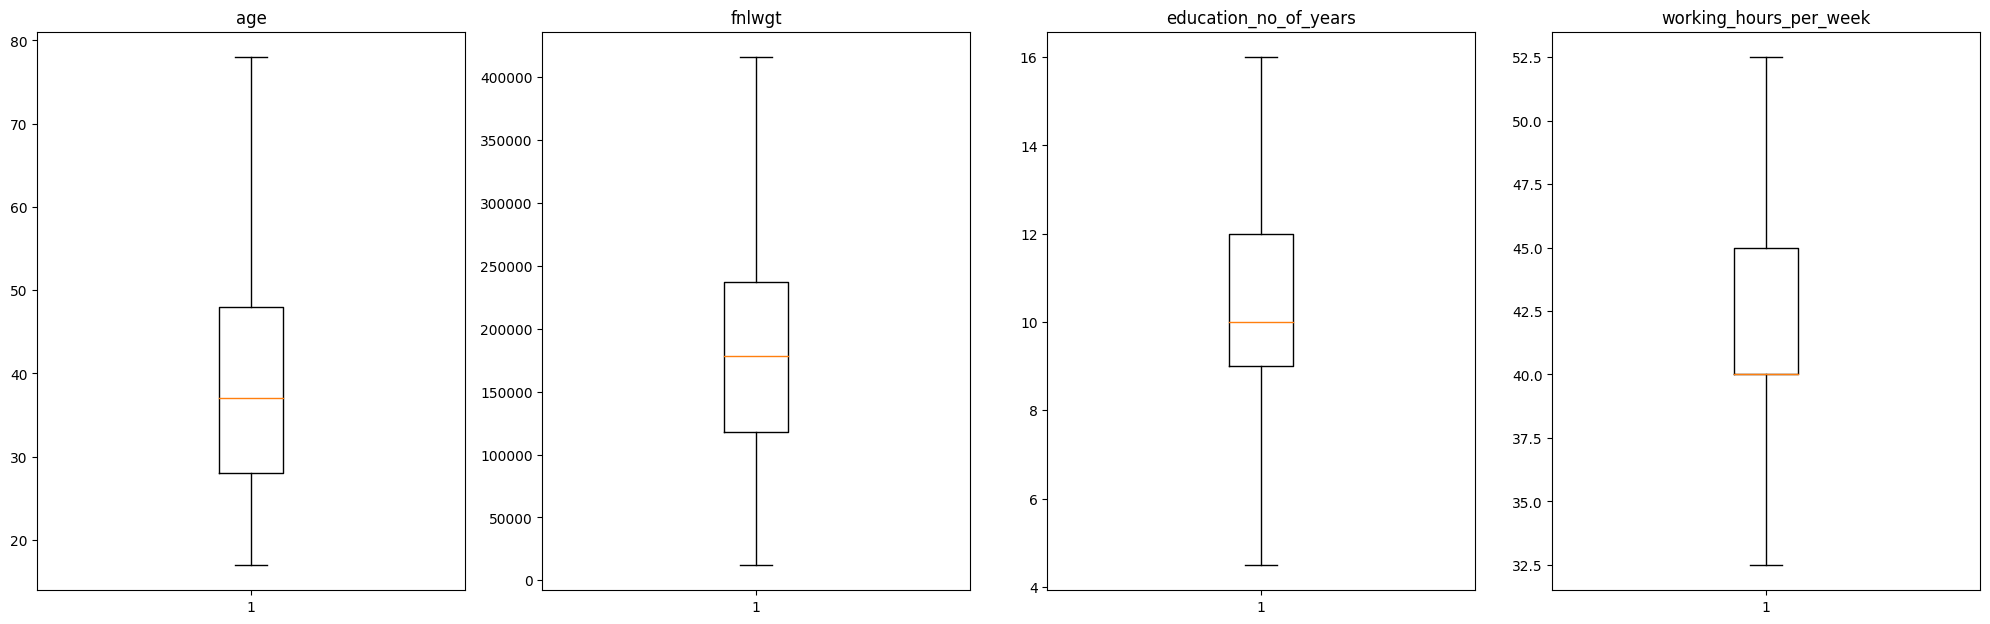

In [38]:
# let's look at box plot to see if outliers have been treated or not
plt.figure(figsize=(20, 30))

for i, variable in enumerate(numerical_col):
    plt.subplot(5, 4, i + 1)
    plt.boxplot(data[variable], whis=1.5)
    plt.tight_layout()
    plt.title(variable)

plt.show()

### Data Preparation for Modeling

**Encoding >50K as 0 and <=50K as 1 as government wants to find underprivileged section of society.**

In [39]:
data["salary"] = data["salary"].apply(lambda x: 1 if x == " <=50K" else 0)

**Creating training and test sets.**

In [40]:
# specifying the independent  and dependent variables
X = data.drop(["salary"], axis=1)
Y = data["salary"]

In [41]:
scaler = MinMaxScaler()
X[["age","fnlwgt","education_no_of_years","working_hours_per_week"]] = scaler.fit_transform(X[["age","fnlwgt","education_no_of_years","working_hours_per_week"]])

In [42]:
# creating dummy variables
X = pd.get_dummies(X, drop_first=True,dtype=int)

# splitting data in train and test sets
X_train, X_test, y_train, y_test = train_test_split(
    X, Y, test_size=0.30, random_state=1
)

In [43]:
print("Shape of Training set : ", X_train.shape)
print("Shape of test set : ", X_test.shape)
print("Percentage of classes in training set:")
print(y_train.value_counts(normalize=True))
print("Percentage of classes in test set:")
print(y_test.value_counts(normalize=True))

Shape of Training set :  (22771, 52)
Shape of test set :  (9760, 52)
Percentage of classes in training set:
salary
1    0.758026
0    0.241974
Name: proportion, dtype: float64
Percentage of classes in test set:
salary
1    0.761373
0    0.238627
Name: proportion, dtype: float64


In [44]:
X_train,X_test,y_train,y_test = np.array(X_train),np.array(X_test),np.array(y_train),np.array(y_test)

## Model Building

### Model Evaluation Criterion

**Model can make wrong predictions as**:

1. Predicting a person has a salary <=50K but in reality the salary of the person is >50K.

2. Predicting a person doesn't have a salary <=50K but in reality the salary of the person is <=50k.

**Which case is more important?**

* Both the cases are important as:

  * If we predict a person has a salary <=50K but actually the salary is >50K then a wrong person will be getting the benefits of the scheme and government might lose resources.

  * If we predict a person doesn't have a salary <=50K but actually the salary is <=50K that person will not be able to avail the benefits of the scheme constituting to opportunity loss.


**How to reduce this loss?**

* We need to reduce both False Negatives and False Positives

* `f1_score` should be maximized as the greater the f1_score, the higher the chances of reducing both False Negatives and False Positives and identifying both the classes correctly

**First, let's create functions to calculate different metrics and confusion matrix so that we don't have to use the same code repeatedly for each model.**

* The model_performance_classification function will be used to check the model performance of models.
* The confusion_matrix_svm function will be used to plot confusion matrix.

In [45]:
# defining a function to compute different metrics to check performance of a classification model
def model_performance_classification(
    model, predictors, target
):
    """
    Function to compute different metrics to check classification model performance

    model: classifier
    predictors: independent variables
    target: dependent variable
    """

    # predicting the class labels.
    pred = model.predict(predictors)

    acc = accuracy_score(target, pred)  # to compute Accuracy
    recall = recall_score(target, pred)  # to compute Recall
    precision = precision_score(target, pred)  # to compute Precision
    f1 = f1_score(target, pred)  # to compute F1-score

    # creating a dataframe of metrics
    df_perf = pd.DataFrame(
        {"Accuracy": acc, "Recall": recall, "Precision": precision, "F1": f1,},
        index=[0],
    )

    return df_perf

In [46]:
# defining a function to plot the confusion_matrix of a classification model


def confusion_matrix_sklearn(model, predictors, target):
    """
    To plot the confusion_matrix with percentages

    model: classifier
    predictors: independent variables
    target: dependent variable
    """
    y_pred = model.predict(predictors)
    cm = confusion_matrix(y_true=target,y_pred= y_pred)
    labels = np.asarray(
        [
            ["{0:0.0f}".format(item) + "\n{0:.2%}".format(item / cm.flatten().sum())]
            for item in cm.flatten()
        ]
    ).reshape(2, 2)

    plt.figure(figsize=(6, 4))
    sns.heatmap(cm, annot=labels, fmt="")
    plt.ylabel("True label")
    plt.xlabel("Predicted label")

### Support Vector Machine (Kernel = "linear")

In [47]:
# fitting SVM model
svm = SVC(kernel='linear')
svm.fit(X_train,y_train)

SVC(kernel='linear')

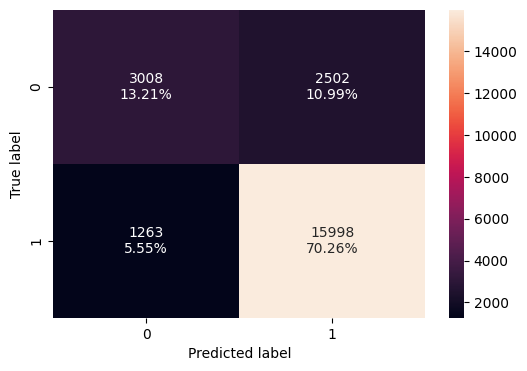

In [48]:
confusion_matrix_sklearn(model=svm,predictors= X_train, target=y_train)

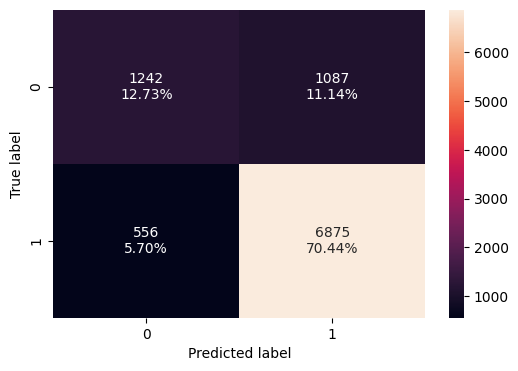

In [49]:
confusion_matrix_sklearn(model=svm,predictors= X_test, target=y_test)

In [50]:
print("Training performance:")
model_lin_kern = model_performance_classification(model=svm, predictors=X_train, target=y_train)

Training performance:


In [51]:
model_lin_kern

,Accuracy,Recall,Precision,F1
0,0.834658,0.926829,0.864757,0.894718


In [52]:
print("Test performance:")
model_lin_kern_test = model_performance_classification(model=svm, predictors=X_test, target=y_test)

Test performance:


In [53]:
model_lin_kern_test

,Accuracy,Recall,Precision,F1
0,0.83166,0.925178,0.863477,0.893263


**Observations**

- The train and test f1_score of the model is ~0.89 and we will try to improve it further

## Model Performance Improvement

* Let's see if the f1_score can be improved further by changing the hyperparameters i.e, the kernel, C and gamma.

### Support Vector Machine (Kernel = "Polynomial" , Degree = 2 )

In [54]:
# fitting SVM model
svm = SVC(kernel='poly',degree=2)
svm.fit(X_train,y_train)

SVC(degree=2, kernel='poly')

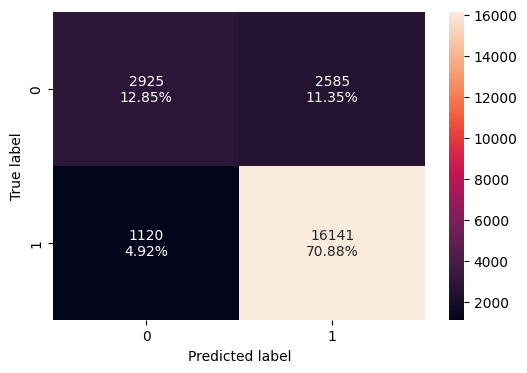

In [55]:
confusion_matrix_sklearn(model=svm,predictors= X_train, target=y_train)

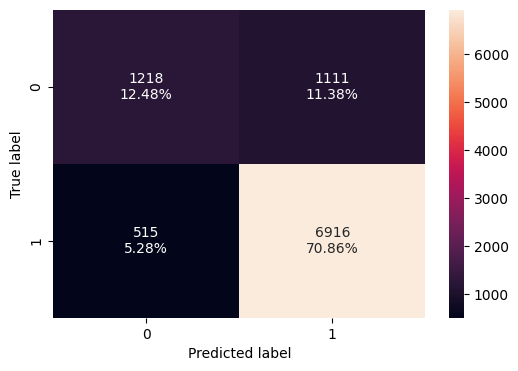

In [56]:
confusion_matrix_sklearn(model=svm,predictors= X_test, target=y_test)

In [57]:
print("Training performance:")
model_poly_kern = model_performance_classification(model=svm, predictors=X_train, target=y_train)

Training performance:


In [58]:
model_poly_kern

,Accuracy,Recall,Precision,F1
0,0.837293,0.935114,0.861957,0.897046


In [59]:
print("Test performance:")
model_poly_kern_test = model_performance_classification(model=svm, predictors=X_test, target=y_test)

Test performance:


In [60]:
model_poly_kern_test

,Accuracy,Recall,Precision,F1
0,0.833402,0.930696,0.861592,0.894812


**Observations**

- Both the train and test performance has been improved.

Let's increase the degree of the polynomial.

### Support Vector Machine (Kernel = "Polynomial" , Degree = 3 )

In [61]:
# fitting SVM model
svm = SVC(kernel='poly',degree=3)
svm.fit(X_train,y_train)

SVC(kernel='poly')

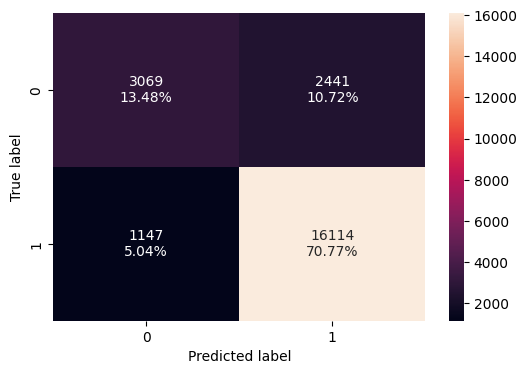

In [62]:
confusion_matrix_sklearn(model=svm,predictors= X_train, target=y_train)

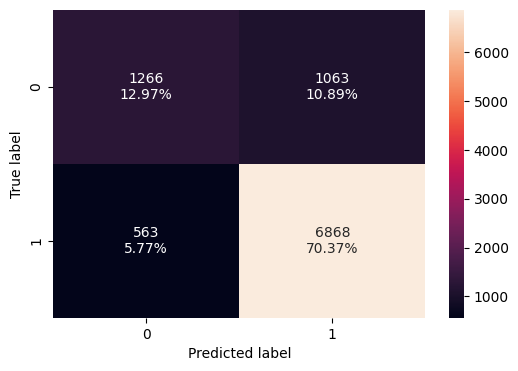

In [63]:
confusion_matrix_sklearn(model=svm,predictors= X_test, target=y_test)

In [64]:
print("Training performance:")
model_poly_kern_3 = model_performance_classification(model=svm, predictors=X_train, target=y_train)

Training performance:


In [65]:
model_poly_kern_3

,Accuracy,Recall,Precision,F1
0,0.842431,0.93355,0.868445,0.899821


In [66]:
print("Test performance:")
model_poly_kern_3_test = model_performance_classification(model=svm, predictors=X_test, target=y_test)

Test performance:


In [67]:
model_poly_kern_3_test

,Accuracy,Recall,Precision,F1
0,0.833402,0.924236,0.865969,0.894154


**Observations**

- As expected, the performance has been improved.

- By increasing the degree of the polynomial, we have a lot of freedom in the decision boundary.

- But, this will typically lead to overfitting.

Let's change the kernel to rbf.

### Support Vector Machine (Kernel = "Rbf")

In [68]:
0# fitting SVM model
svm = SVC(kernel='rbf')
svm.fit(X_train,y_train)

SVC()

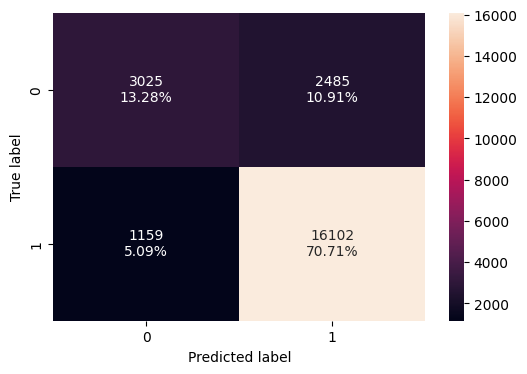

In [69]:
confusion_matrix_sklearn(model=svm,predictors= X_train, target=y_train)

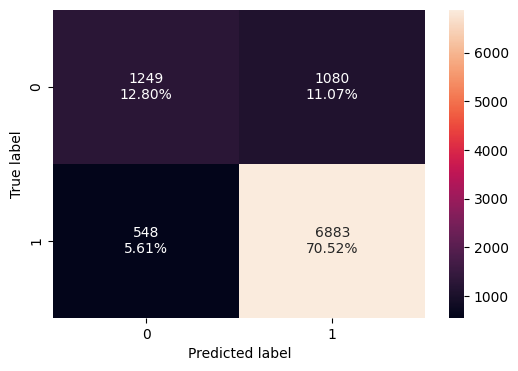

In [70]:
confusion_matrix_sklearn(model=svm,predictors= X_test, target=y_test)

In [71]:
print("Training performance:")
model_rbf_kern = model_performance_classification(model=svm, predictors=X_train, target=y_train)

Training performance:


In [72]:
model_rbf_kern

,Accuracy,Recall,Precision,F1
0,0.839972,0.932854,0.866304,0.898349


In [73]:
print("Test performance:")
model_rbf_kern_test = model_performance_classification(model=svm, predictors=X_test, target=y_test)

Test performance:


In [74]:
model_rbf_kern_test

,Accuracy,Recall,Precision,F1
0,0.833197,0.926255,0.864373,0.894245


**Observations**

- There is no much improvment.

### Support Vector Machine (Gamma = 0.016)

In [75]:
svm._gamma

0.16845174285227346

In [76]:
0# fitting SVM model
svm = SVC(kernel='poly',degree=3,gamma=0.016)
svm.fit(X_train,y_train)

SVC(gamma=0.016, kernel='poly')

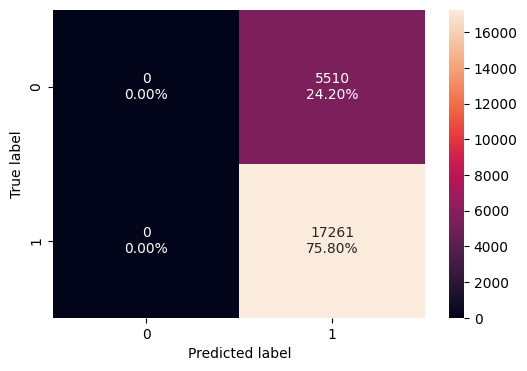

In [77]:
confusion_matrix_sklearn(model=svm,predictors= X_train, target=y_train)

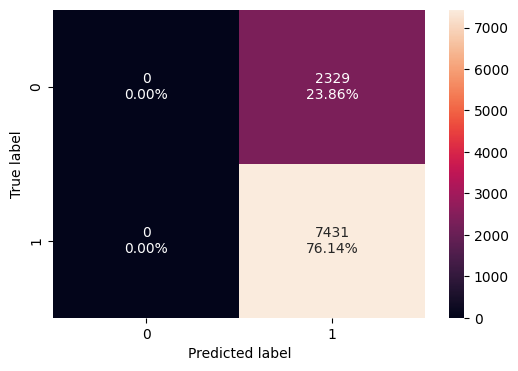

In [78]:
confusion_matrix_sklearn(model=svm,predictors= X_test, target=y_test)

In [79]:
print("Training performance:")
model_poly_gamma_1 = model_performance_classification(model=svm, predictors=X_train, target=y_train)

Training performance:


In [80]:
model_poly_gamma_1

,Accuracy,Recall,Precision,F1
0,0.758026,1.0,0.758026,0.86236


In [81]:
print("Test performance:")
model_poly_gamma_1_test = model_performance_classification(model=svm, predictors=X_test, target=y_test)

Test performance:


In [82]:
model_poly_gamma_1_test

,Accuracy,Recall,Precision,F1
0,0.761373,1.0,0.761373,0.864522


**Observations**

- Eventhough the performance is not as good as before, the difference in the train and test scores is very less comparitively.

Let's increase the value of gamma.

### Support Vector Machine (Gamma = 0.3 )

In [83]:
0# fitting SVM model
svm = SVC(kernel='poly',degree=3,gamma=0.3)
svm.fit(X_train,y_train)

SVC(gamma=0.3, kernel='poly')

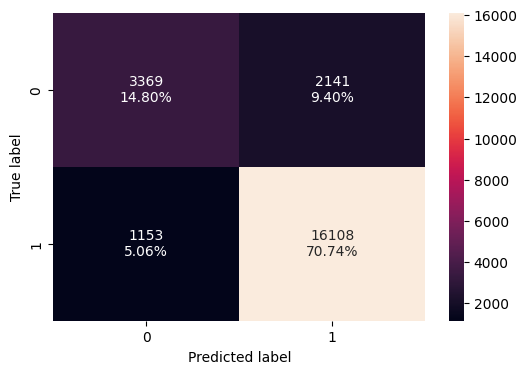

In [84]:
confusion_matrix_sklearn(model=svm,predictors= X_train, target=y_train)

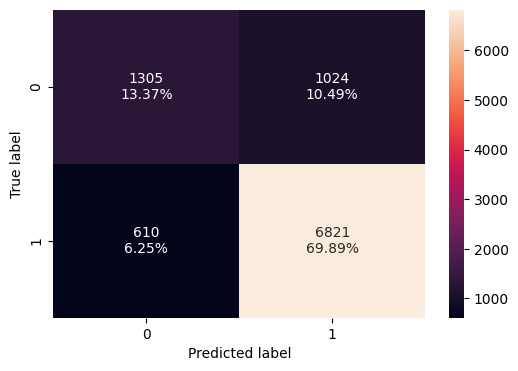

In [85]:
confusion_matrix_sklearn(model=svm,predictors= X_test, target=y_test)

In [86]:
print("Training performance:")
model_poly_gamma_2 = model_performance_classification(model=svm, predictors=X_train, target=y_train)

Training performance:


In [87]:
model_poly_gamma_2

,Accuracy,Recall,Precision,F1
0,0.855342,0.933202,0.882679,0.907237


In [88]:
print("Test performance:")
model_poly_gamma_2_test = model_performance_classification(model=svm, predictors=X_test, target=y_test)

Test performance:


In [89]:
model_poly_gamma_2_test

,Accuracy,Recall,Precision,F1
0,0.832582,0.917911,0.869471,0.893035


**Observations**

- The performance on the training test has improved.

### Support Vector Machine ( C = 0.1 )

In [90]:
0# fitting SVM model
svm = SVC(kernel='poly',degree=3,gamma=0.3,C=0.1)
svm.fit(X_train,y_train)

SVC(C=0.1, gamma=0.3, kernel='poly')

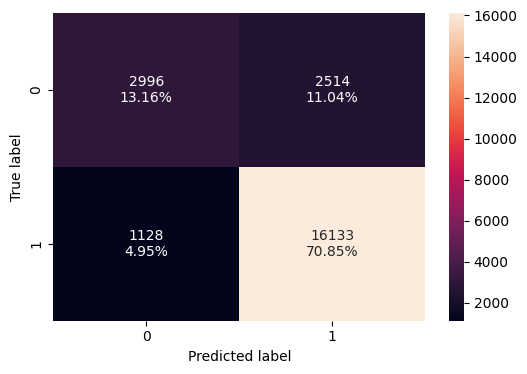

In [91]:
confusion_matrix_sklearn(model=svm,predictors= X_train, target=y_train)

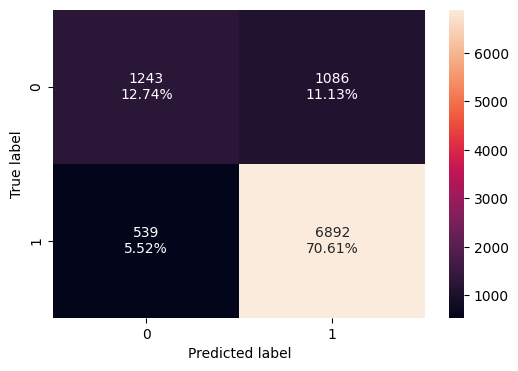

In [92]:
confusion_matrix_sklearn(model=svm,predictors= X_test, target=y_test)

In [93]:
print("Training performance:")
model_poly_C_1 = model_performance_classification(model=svm, predictors=X_train, target=y_train)

Training performance:


In [94]:
model_poly_C_1

,Accuracy,Recall,Precision,F1
0,0.84006,0.93465,0.865179,0.898574


In [95]:
print("Test performance:")
model_poly_C_1_test = model_performance_classification(model=svm, predictors=X_test, target=y_test)

Test performance:


In [96]:
model_poly_C_1_test

,Accuracy,Recall,Precision,F1
0,0.833504,0.927466,0.863876,0.894542


**Observations**

- No improvement.

### Support Vector Machine ( C = 0.05 )

In [97]:
0# fitting SVM model
svm = SVC(kernel='poly',degree=3,gamma=0.3,C=0.05)
svm.fit(X_train,y_train)

SVC(C=0.05, gamma=0.3, kernel='poly')

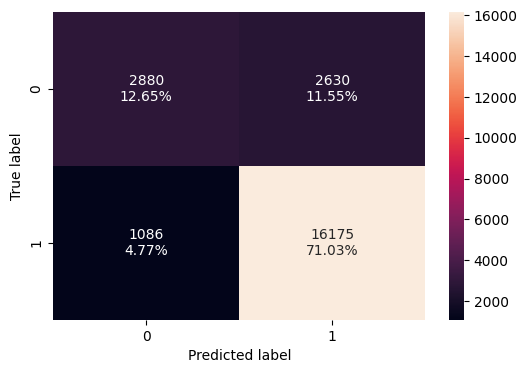

In [98]:
confusion_matrix_sklearn(model=svm,predictors= X_train, target=y_train)

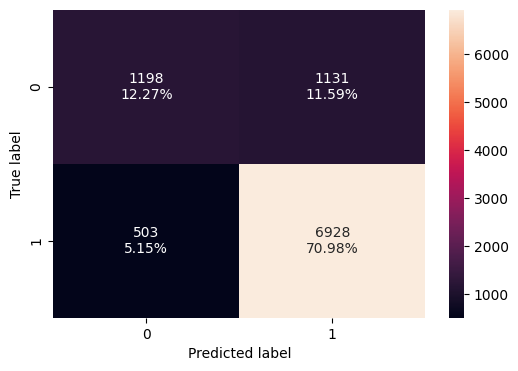

In [99]:
confusion_matrix_sklearn(model=svm,predictors= X_test, target=y_test)

In [100]:
print("Training performance:")
model_poly_C_2 = model_performance_classification(model=svm, predictors=X_train, target=y_train)

Training performance:


In [101]:
model_poly_C_2

,Accuracy,Recall,Precision,F1
0,0.83681,0.937084,0.860144,0.896967


In [102]:
print("Test performance:")
model_poly_C_2_test = model_performance_classification(model=svm, predictors=X_test, target=y_test)

Test performance:


In [103]:
model_poly_C_2_test

,Accuracy,Recall,Precision,F1
0,0.832582,0.932311,0.85966,0.894513


**Observations**

- No improvement.

## Model Performance Comparison and Final Model Selection

In [104]:
# training performance comparison

models_train_comp_df = pd.concat(
    [
        model_lin_kern.T,
        model_poly_kern.T,
        model_poly_kern_3.T,
        model_rbf_kern.T,
        model_poly_gamma_1.T,
        model_poly_gamma_2.T,
        model_poly_C_1.T,
        model_poly_C_2.T

    ],
    axis=1,
)
models_train_comp_df.columns = [
    "SVM-Linear Kernel (default)",
    "SVM-Polynomial Kernel , degree = 2",
    "SVM-Polynomial Kernel , degree = 3",
    "SVM-Rbf Kernel",
    "SVM-Polynomial Kernel , degree = 3 , gamma = 0.016 ",
    "SVM-Polynomial Kernel , degree = 3 , gamma = 0.3 ",
    "SVM-Polynomial Kernel , degree = 3 , gamma = 0.3, C = 0.1 ",
    "SVM-Polynomial Kernel , degree = 3 , gamma = 0.3 , C = 0.05 "

]

print("Training performance comparison:")
models_train_comp_df

Training performance comparison:


,SVM-Linear Kernel (default),"SVM-Polynomial Kernel , degree = 2","SVM-Polynomial Kernel , degree = 3",SVM-Rbf Kernel,"SVM-Polynomial Kernel , degree = 3 , gamma = 0.016","SVM-Polynomial Kernel , degree = 3 , gamma = 0.3","SVM-Polynomial Kernel , degree = 3 , gamma = 0.3, C = 0.1","SVM-Polynomial Kernel , degree = 3 , gamma = 0.3 , C = 0.05"
Accuracy,0.834658,0.837293,0.842431,0.839972,0.758026,0.855342,0.840060,0.836810
Recall,0.926829,0.935114,0.933550,0.932854,1.000000,0.933202,0.934650,0.937084
Precision,0.864757,0.861957,0.868445,0.866304,0.758026,0.882679,0.865179,0.860144
F1,0.894718,0.897046,0.899821,0.898349,0.862360,0.907237,0.898574,0.896967


In [105]:
# testing performance comparison

models_test_comp_df = pd.concat(
    [
      model_lin_kern_test.T,
        model_poly_kern_test.T,
        model_poly_kern_3_test.T,
        model_rbf_kern_test.T,
        model_poly_gamma_1_test.T,
        model_poly_gamma_2_test.T,
        model_poly_C_1_test.T,
        model_poly_C_2_test.T
    ],
    axis=1,
)
models_test_comp_df.columns = [
    "SVM-Linear Kernel (default)",
    "SVM-Polynomial Kernel , degree = 2",
    "SVM-Polynomial Kernel , degree = 3",
    "SVM-Rbf Kernel",
    "SVM-Polynomial Kernel , degree = 3 , gamma = 0.016 ",
    "SVM-Polynomial Kernel , degree = 3 , gamma = 0.3 ",
    "SVM-Polynomial Kernel , degree = 3 , gamma = 0.3, C = 0.1 ",
    "SVM-Polynomial Kernel , degree = 3 , gamma = 0.3 , C = 0.05 "

]

print("Test set performance comparison:")
models_test_comp_df

Test set performance comparison:


,SVM-Linear Kernel (default),"SVM-Polynomial Kernel , degree = 2","SVM-Polynomial Kernel , degree = 3",SVM-Rbf Kernel,"SVM-Polynomial Kernel , degree = 3 , gamma = 0.016","SVM-Polynomial Kernel , degree = 3 , gamma = 0.3","SVM-Polynomial Kernel , degree = 3 , gamma = 0.3, C = 0.1","SVM-Polynomial Kernel , degree = 3 , gamma = 0.3 , C = 0.05"
Accuracy,0.831660,0.833402,0.833402,0.833197,0.761373,0.832582,0.833504,0.832582
Recall,0.925178,0.930696,0.924236,0.926255,1.000000,0.917911,0.927466,0.932311
Precision,0.863477,0.861592,0.865969,0.864373,0.761373,0.869471,0.863876,0.859660
F1,0.893263,0.894812,0.894154,0.894245,0.864522,0.893035,0.894542,0.894513


- All the models performed well on both training and test data.
- The model ( SVM-Polynomial Kernel , degree = 3 , gamma = 0.3 ) is the best in terms of the train and test scores.


## Conclusions and Recommendations

* We have been able to build a predictive model that can be used by the government to find the citizens having less than 50K salary with an f1_score of 0.9 on the training set and formulate policies accordingly.

* All the SVM models have given a generalized performance on the training and test sets, and there is very little difference between their performances.

- The government should promote education among citizens, they should make policies to make education accessible to all, as we say in our analysis that people who have higher education are more likely to have a salary above 50,000 Dollars.
- Working hours is one of the significant predictors of salary, The government should implement laws to ensure that people are paid fairly for their work and are not overworked for the increase in salaries. This would improve work-life balance.
- Reforms should be made for private-sector employees so that they are paid fairly for their work.
- Policy formulated by the government should be considerate of equal pay and counter the pay gap that exists in society.

## <a name='link1'>Appendix: Detailed Exploratory Data Analysis (EDA)</a>

### Univariate Analysis

#### Observations on fnlwgt

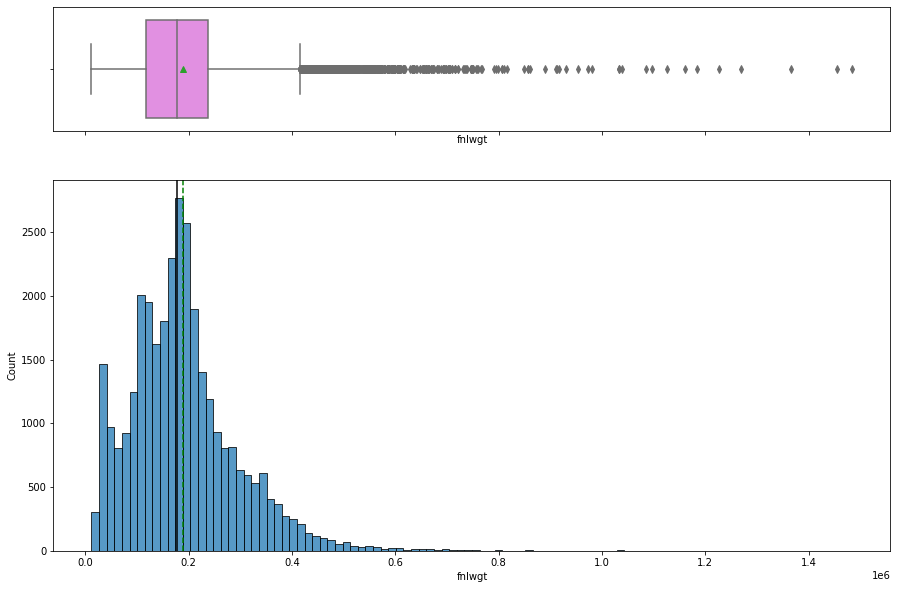

In [ ]:
histogram_boxplot(df, "fnlwgt", bins=100)

* fnlwght is right-skewed. It has lots of outliers on the right side.

#### Observations on workclass

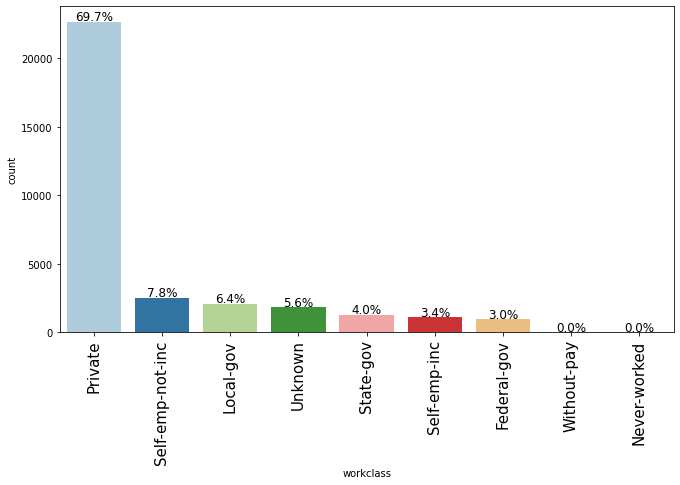

In [ ]:
labeled_barplot(df, "workclass", perc=True)

* ~70% of the observations are from the Private sector working class.
* As expected from the number of hours per week.

#### Observations on marital_status

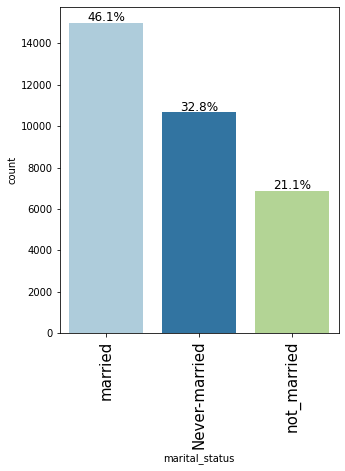

In [ ]:
labeled_barplot(df, "marital_status", perc=True)

* 46.1% of the observations in the dataset are married followed by 32.8% of the people who never married.

#### Observations on salary

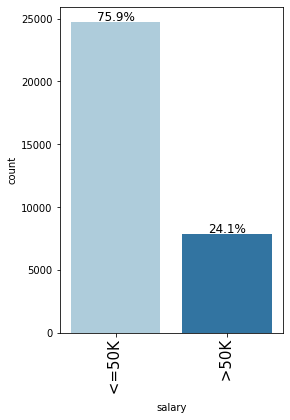

In [ ]:
labeled_barplot(df, "salary", perc=True)

* ~24% of the observations have a salary above 50K and while ~76% have a salary below 50K

### Bivariate analysis

#### Correlation Check

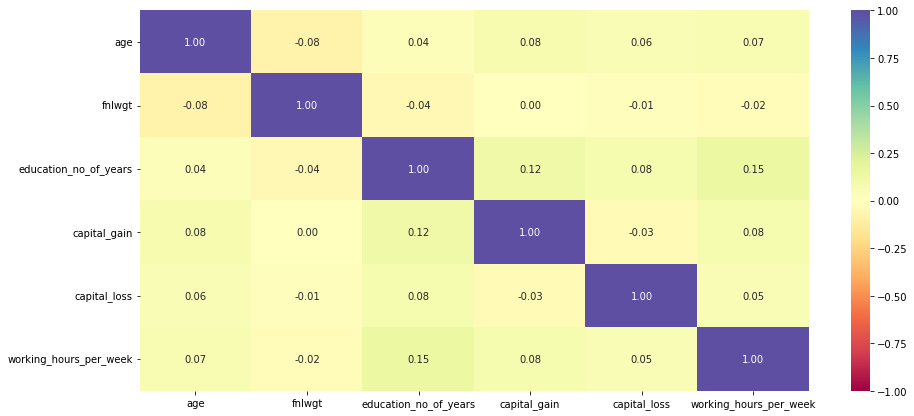

In [ ]:
plt.figure(figsize=(15, 7))
sns.heatmap(df.corr(), annot=True, vmin=-1, vmax=1, fmt=".2f", cmap="Spectral")
plt.show()

* There is no significant correlation between the columns.

#### salary vs sex

salary   <=50K   >50K    All
sex                         
All      24692   7839  32531
Male     15113   6660  21773
Female    9579   1179  10758
------------------------------------------------------------------------------------------------------------------------


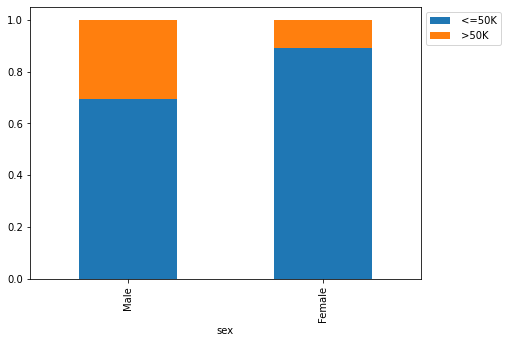

In [ ]:
stacked_barplot(df, "sex", "salary")

* ~30% of the males have salary >50K whereas only ~10% of the females have salary >50K.
* This shows the pay gap that exists in society and the government should investigate further on it to formulate policy to ensure equal pay.

#### salary vs education

salary         <=50K   >50K    All
education                         
All            24692   7839  32531
Bachelors       3132   2221   5353
HS-grad         8816   1674  10490
Some-college    5894   1386   7280
Masters          763    959   1722
Prof-school      153    423    576
Assoc-voc       1021    361   1382
Doctorate        107    306    413
Assoc-acdm       802    265   1067
10th             871     62    933
11th            1115     60   1175
7th-8th          605     40    645
12th             400     33    433
9th              487     27    514
5th-6th          316     16    332
1st-4th          160      6    166
Preschool         50      0     50
------------------------------------------------------------------------------------------------------------------------


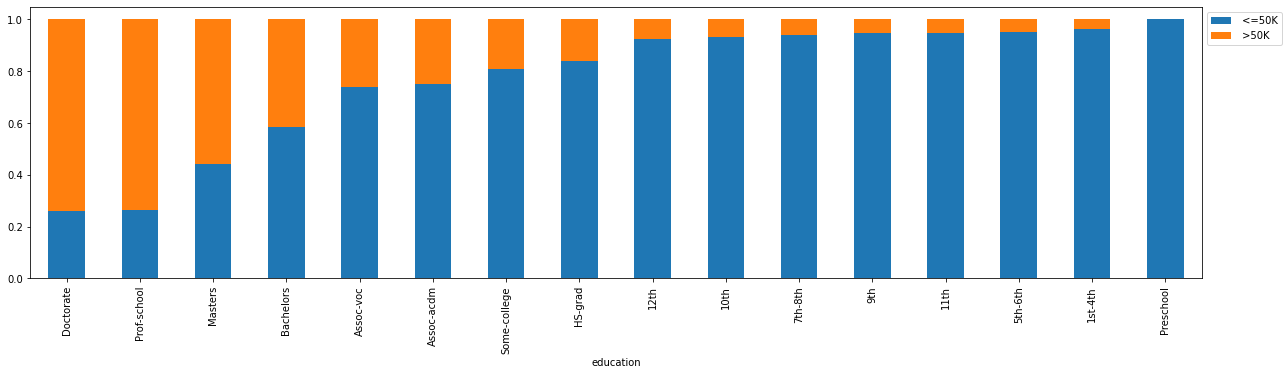

In [ ]:
stacked_barplot(df, "education", "salary")

* ~70% of the people of are Doctorate, graduate from Professional school program (Prof-school) have a salary above $50K.
* This clearly shows a positive relationship between education and salary, the higher the education higher is the salary.

#### salary vs occupation

salary              <=50K   >50K    All
occupation                             
All                 24692   7839  32531
Exec-managerial      2097   1968   4065
Prof-specialty       2278   1858   4136
Sales                2666    983   3649
Craft-repair         3164    929   4093
Adm-clerical         3259    507   3766
Transport-moving     1277    320   1597
Tech-support          644    283    927
Machine-op-inspct    1750    249   1999
Protective-serv       438    211    649
Unknown              1652    191   1843
Other-service        3153    137   3290
Farming-fishing       877    115    992
Handlers-cleaners    1283     86   1369
Armed-Forces            8      1      9
Priv-house-serv       146      1    147
------------------------------------------------------------------------------------------------------------------------


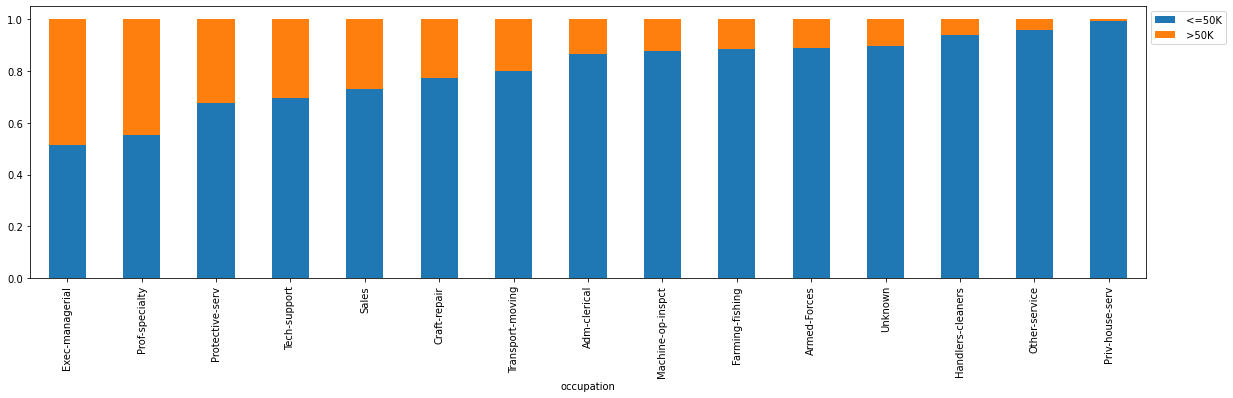

In [ ]:
stacked_barplot(df, "occupation", "salary")

- ~50% of the people whose occupation is of Executive Manager, Professor-speciality have a salary above $50,000
- People with occupations like Private house service,handlers-cleaners, farming-fishing have a higher likelihood of having below 50K salary.

#### salary vs race

salary               <=50K   >50K    All
race                                    
All                  24692   7839  32531
White                20674   7115  27789
Black                 2735    387   3122
Asian-Pac-Islander     762    276   1038
Amer-Indian-Eskimo     275     36    311
Other                  246     25    271
------------------------------------------------------------------------------------------------------------------------


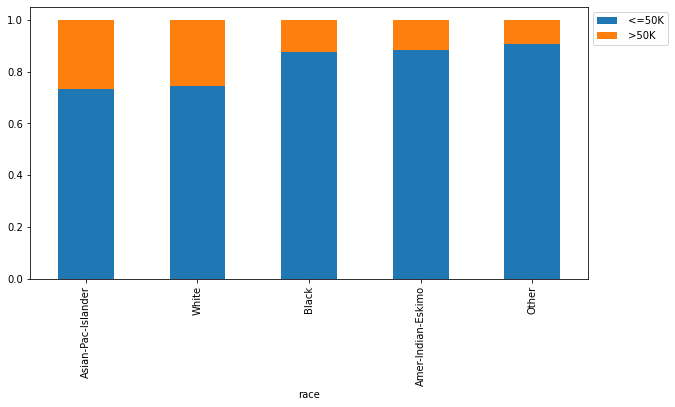

In [ ]:
stacked_barplot(df, "race", "salary")

* 25% of the White and Asia-Pacific people have a salary more than 50K salary as compared to people from other race.

#### salary vs workclass

salary             <=50K   >50K    All
workclass                             
All                24692   7839  32531
Private            17706   4961  22667
Self-emp-not-inc    1816    724   2540
Self-emp-inc         494    622   1116
Local-gov           1476    617   2093
Federal-gov          589    371    960
State-gov            945    353   1298
Unknown             1645    191   1836
Never-worked           7      0      7
Without-pay           14      0     14
------------------------------------------------------------------------------------------------------------------------


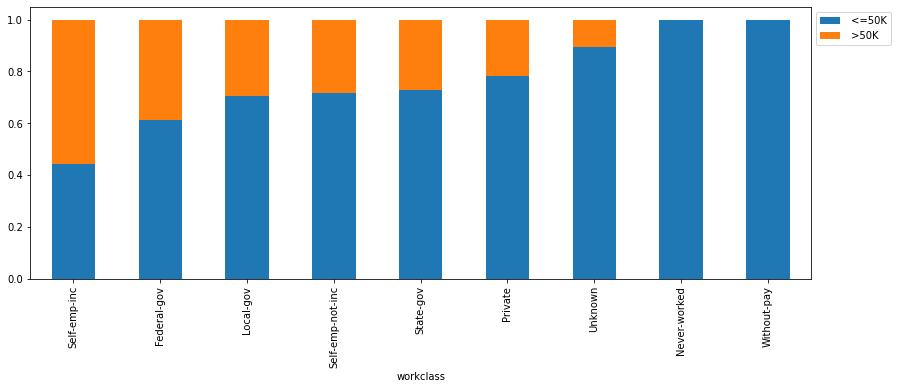

In [ ]:
stacked_barplot(df, "workclass", "salary")

* ~50% of the self-employed people have a salary above 50K followed by ~40% of the federal govt employee who has salary more than 50K.
* ~20% of the people working in the private sector earn more than 50K.

#### salary vs marital_status

salary           <=50K   >50K    All
marital_status                      
All              24692   7839  32531
married           8293   6700  14993
not_married       6229    648   6877
Never-married    10170    491  10661
------------------------------------------------------------------------------------------------------------------------


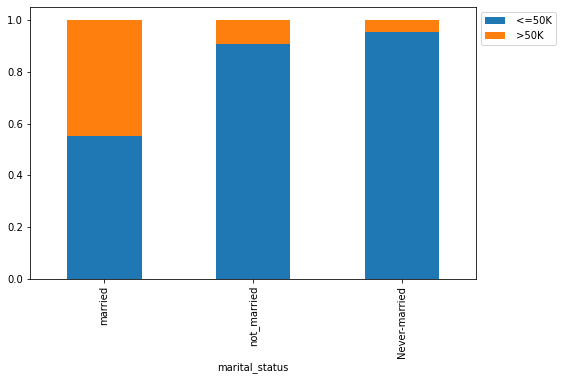

In [ ]:
stacked_barplot(df, "marital_status", "salary")

* Married people have a higher likelihood of getting a salary above 50K compared to Never Married and Not married people.

#### salary vs age

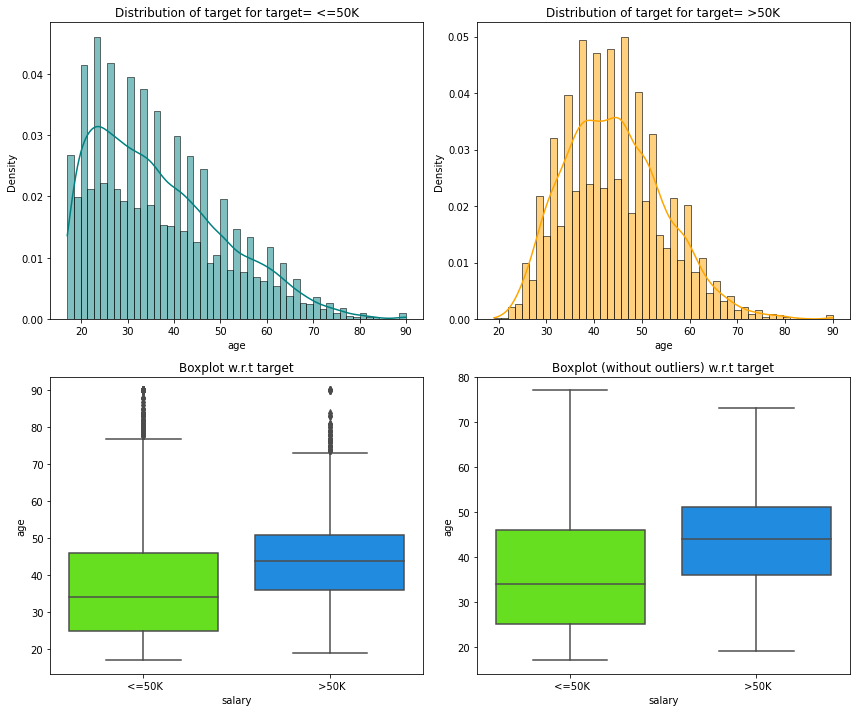

In [ ]:
distribution_plot_wrt_target(df, "age", "salary")

* People who more than 50K salary are generally older having an average age of around 48 years.
* People who have less than 50K salary have an average age of around 36.

#### salary vs working_hours_per_week

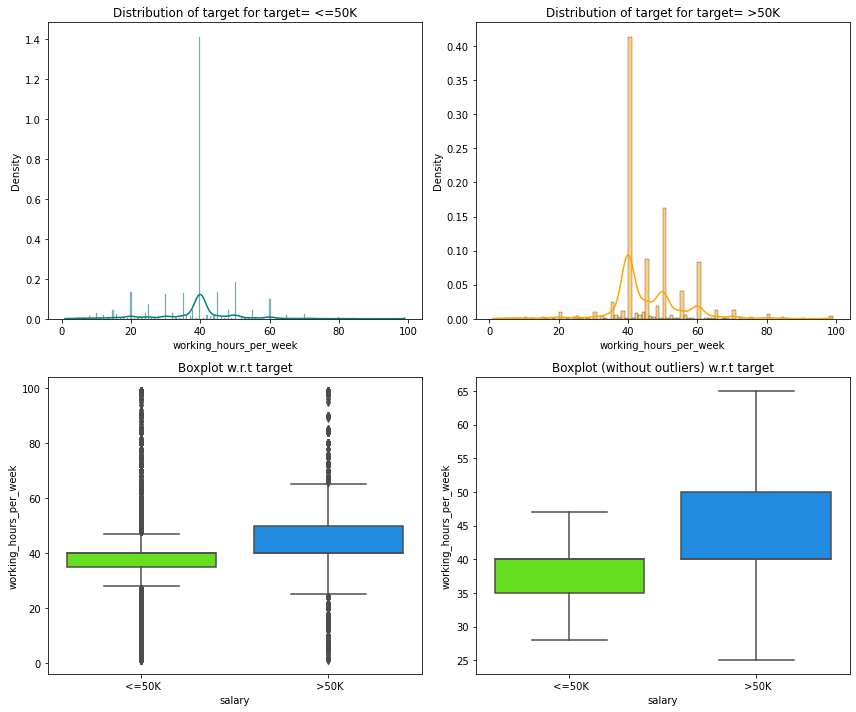

In [ ]:
distribution_plot_wrt_target(df, "working_hours_per_week", "salary")

* Majority of people having above 50K salary work around 40 hours per week.
* Those having >50K salary have a higher range of working hours as compared to the ones with <=50K, but there are outliers present.

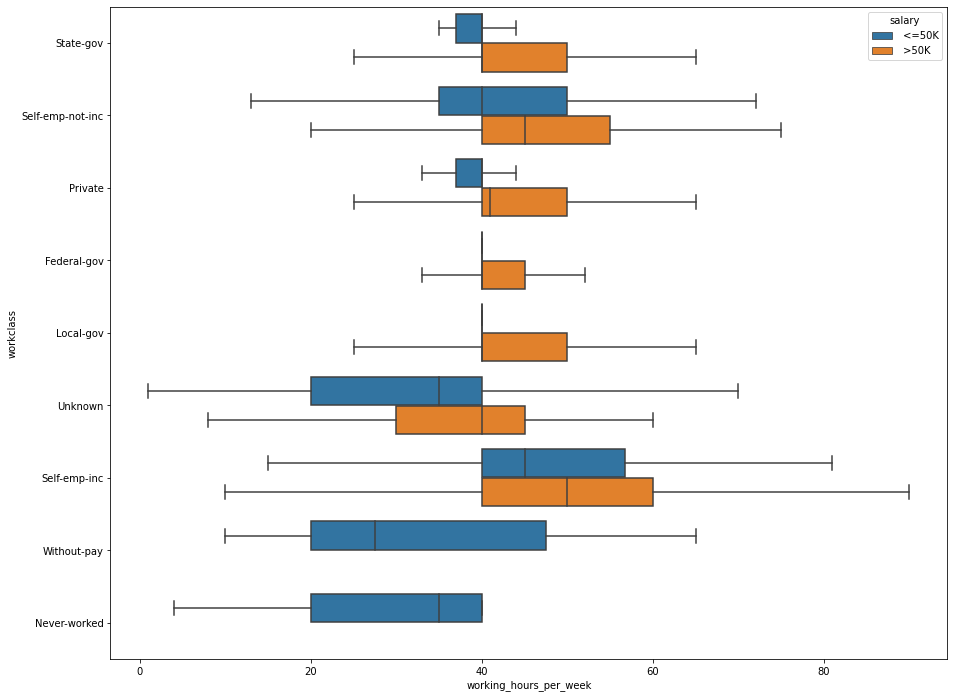

In [ ]:
# lets see how working hours per week vary across different occupation
plt.figure(figsize=(15, 12))
sns.boxplot(
    y="workclass", x="working_hours_per_week", data=df, hue="salary", showfliers=False
)
plt.show()

* Private sector employees work for more hours to get a salary above 50K.
* There's large variability in the working hours of self-employed people which makes sense as they might be working at their ease.
* Without pay and never worked will have no income or less than 50K income.
* The number of working hours for many government employees is concentrated at 40 hrs a week, which makes sense as government employees generally have fixed working hours.

### To jump back to the EDA summary section, click <a href = #link2>here</a>.